<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data Predictions

# Problem Statement

To construct a linear regression model to predict housing prices in Ames, Iowa and in doing so, identify features which prices are most sensitive to. The accuracy of the model will be evaluated by both root mean squared error (RMSE) as well as coefficient of determination, R<sup>2</sup>.

# Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Preprocessing](#Model-Preprocessing)
- [Baseline Model Fitting](#Baseline-Model-Fitting)
- [Model Selection](#Model-Selection)
- [Model Validation with cross_val_score](#Model-Validation-with-cross_val_score)
- [Interpreting the Lasso Model](#Interpreting-the-Lasso-Model)
- [Output for Kaggle](#Output-for-Kaggle)
- [Does PolynomialFeatures help in price prediction?](#Does-PolynomialFeatures-help-in-price-prediction?)
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)

# Background

 ##### [Back to Contents](#Contents:)

Housing is a basic need of humanity. To some, it is simply a place to live. To others, its an instrument of investment, where handsome profits could be made. Common sense dictates that there are some universally agreed constructs that strongly correlates with house prices, such as distance to amenities or transport. However, these may not fully account for the true value of the house.

By distilling the relationship between sale prices and various features of a house, our model is able to identify which features are significant in influencing its value and guide homeowners in refurbishing their houses to fetch the most value. In addition, homeowners are also able to make a decent estimation of their house value given its features.

This codebook aims to predict housing prices in Ames, Iowa. Data was obtained from [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data). It is worth noting that any model would be sensitive to time and context and hence unique to the locale. In other words, for the same geographical location, features which might be important at a given time period might not be same as those 2 decades ago, as demographics shift. Naturally, features which are important to a given locale might not necessarily be the same as those for another locale.

# Data Import & Cleaning

 ##### [Back to Contents](#Contents:)

In [68]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [69]:
train = pd.read_csv('datasets/train.csv')

# Clean data type

train['MS SubClass'] = train['MS SubClass'].astype(str)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   object 
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Handle null values

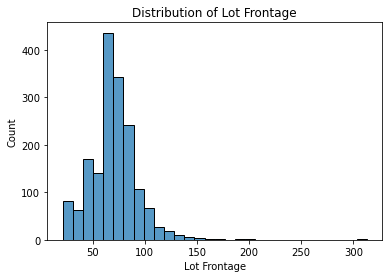

In [71]:
sns.histplot(data=train, x='Lot Frontage', bins=30)
plt.title('Distribution of Lot Frontage')
plt.savefig('Charts/null_lot_frontage.jpg', bbox_inches='tight')

<font color='blue'> Lot Frontage is continuous with a somewhat normal distribution. Let's impute with mean for simplicity

In [72]:
train[pd.isna(train['Mas Vnr Type'])][['Mas Vnr Type', 'Mas Vnr Area']]

,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


<font color='blue'> Mas Vnr Area is null because Mas Vnr Type is null. Let's replace null Mas Vnr Area with 0

In [73]:
train[pd.isna(train['Bsmt Exposure'])][['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure
12,NaN,NaN,NaN
93,NaN,NaN,NaN
114,NaN,NaN,NaN
146,NaN,NaN,NaN
183,NaN,NaN,NaN
240,NaN,NaN,NaN
249,NaN,NaN,NaN
256,NaN,NaN,NaN
390,NaN,NaN,NaN
437,NaN,NaN,NaN


<font color='blue'> The Bsmt fields are null if the house has no basement. There are 2 conflicting records where 'Bsmt Exposure' indicates no basement but 'Bsmt Qual' and 'Bsmt Cond' indicate otherwise. Let's assume that 'Bsmt Exposure' is the column of truth for whether there is a basement, and update the other columns accordingly. For numerical columns, set to 0.
    
<font color='blue'> A basement can have up to 2 types. Type 2 will be set to 'No bsmt' if it is null.

In [74]:
pd.set_option('display.max_rows', 500)
train[pd.isna(train['Garage Finish'])][['Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,0.0,0.0,NaN,NaN
103,NaN,NaN,0.0,0.0,NaN,NaN
114,NaN,NaN,0.0,0.0,NaN,NaN
120,NaN,NaN,0.0,0.0,NaN,NaN
134,NaN,NaN,0.0,0.0,NaN,NaN
136,NaN,NaN,0.0,0.0,NaN,NaN


<font color='blue'> The Garage fields are null if the house has no garage. There is 1 conflicting record where 'Garage Finish' indicates no basement but 'Garage Type' indicate otherwise. Let's assume that 'Garage Finish' is the column of truth for whether there is a basement, and update the other columns accordingly. For numerical columns, set to 0.

In [75]:
## Replace null

train['Alley'] = train['Alley'].apply(lambda x: 'No access' if pd.isna(x) else x)
train['Lot Frontage'] = train['Lot Frontage'].apply(lambda x: np.mean(train['Lot Frontage']) if pd.isna(x) else x)
train['Mas Vnr Area'] = train.apply(lambda x: 0 if pd.isna(x['Mas Vnr Type']) else x['Mas Vnr Area'], axis=1)
train['Mas Vnr Type'] = train['Mas Vnr Type'].apply(lambda x: 'None' if pd.isna(x) else x)
train['Fence'] = train['Fence'].apply(lambda x: 'No fence' if pd.isna(x) else x)
train['Fireplace Qu'] = train['Fireplace Qu'].apply(lambda x: 'No fireplace' if pd.isna(x) else x)
train['Misc Feature'] = train['Misc Feature'].apply(lambda x: 'No misc feature' if pd.isna(x) else x)

# 'No bsmt' if no basement

train['Bsmt Qual'] = train.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) else x['Bsmt Qual'], axis = 1)
train['Bsmt Cond'] = train.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) else x['Bsmt Cond'], axis = 1)

# Can have type 1 but no type 2
# Continuous set to 0 if no basement

train['BsmtFin Type 1'] = train.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) else x['BsmtFin Type 1'], axis = 1)
train['BsmtFin SF 1'] = train.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['BsmtFin SF 1'], axis = 1)
train['BsmtFin SF 2'] = train.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) or pd.isna(x['BsmtFin Type 2']) else x['BsmtFin SF 2'], axis = 1)
train['BsmtFin Type 2'] = train.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) or pd.isna(x['BsmtFin Type 2']) else x['BsmtFin Type 2'], axis = 1)
train['Bsmt Unf SF'] = train.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Bsmt Unf SF'], axis = 1)
train['Total Bsmt SF'] = train.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Total Bsmt SF'], axis = 1)
train['Bsmt Full Bath'] = train.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Bsmt Full Bath'], axis = 1)
train['Bsmt Half Bath'] = train.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Bsmt Half Bath'], axis = 1)
train['Bsmt Exposure'] = train['Bsmt Exposure'].apply(lambda x: 'No bsmt' if pd.isna(x) else x)

# 'No garage' if no garage

train['Garage Type'] = train.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Type'], axis = 1)
train['Garage Cars'] = train.apply(lambda x: 0 if pd.isna(x['Garage Finish']) else x['Garage Cars'], axis = 1)
train['Garage Area'] = train.apply(lambda x: 0 if pd.isna(x['Garage Finish']) else x['Garage Area'], axis = 1)
train['Garage Qual'] = train.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Qual'], axis = 1)
train['Garage Cond'] = train.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Cond'], axis = 1)
train['Garage Finish'] = train.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Finish'], axis = 1)

<font color='blue'> Pool Area and Pool QC will be dropped later as there are only 9 houses with pools, hence will not value add to our models. Garage Yr Blt will also be dropped as it is difficult to impute and handle.

### Check quality of categorical columns

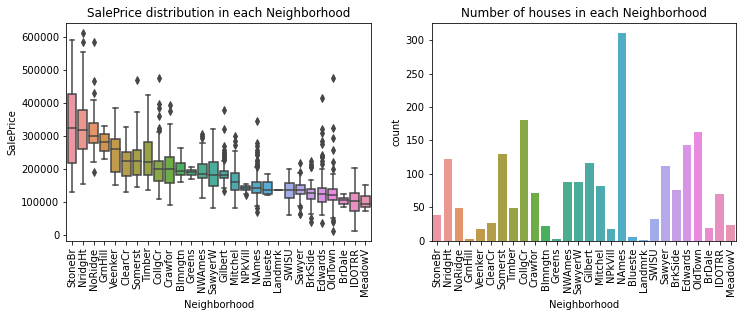

<Figure size 864x360 with 0 Axes>

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.figure(figsize=(12,5))

sns.boxplot(data=train, y='SalePrice', x='Neighborhood', order=train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index, ax = axes[0])
sns.countplot(data=train, x = 'Neighborhood', order=train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index, ax = axes[1])
axes[0].set_title('SalePrice distribution in each Neighborhood')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Number of houses in each Neighborhood')

fig.savefig('Charts/quality_cat_col_neighborhood.jpg', bbox_inches='tight')

<ipython-input-77-94c4fcf8d19f>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2, figsize=(12,4))


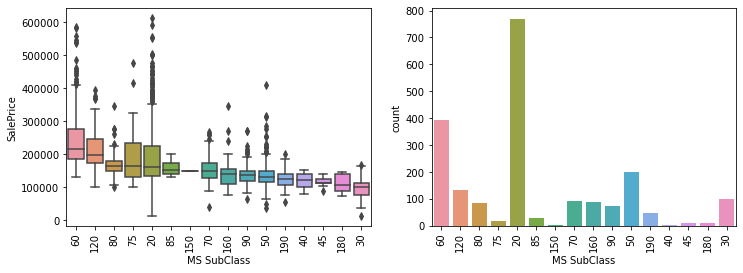

<Figure size 864x360 with 0 Axes>

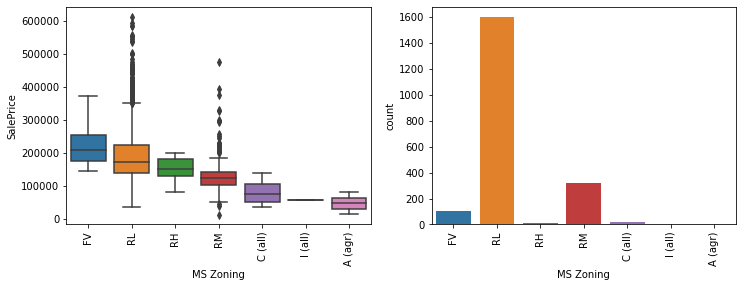

<Figure size 864x360 with 0 Axes>

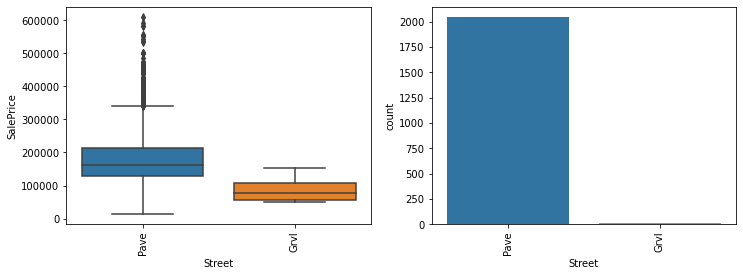

<Figure size 864x360 with 0 Axes>

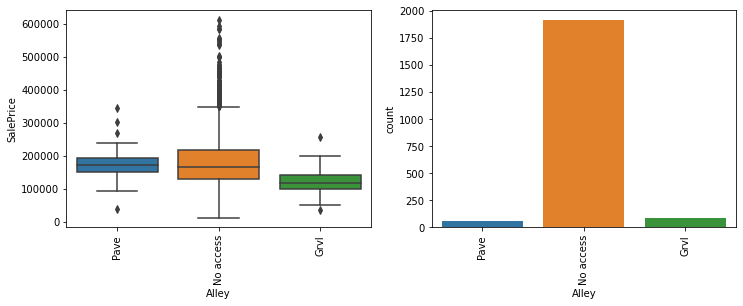

<Figure size 864x360 with 0 Axes>

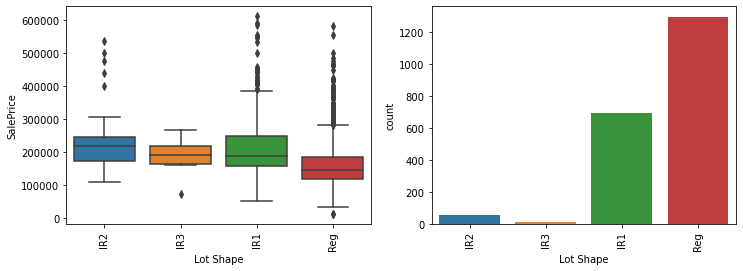

<Figure size 864x360 with 0 Axes>

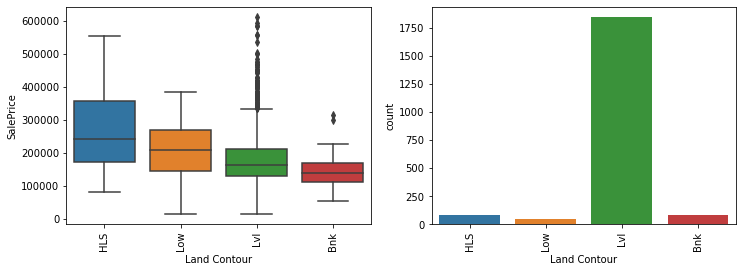

<Figure size 864x360 with 0 Axes>

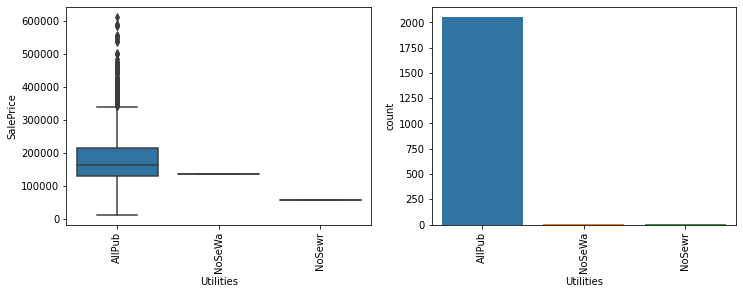

<Figure size 864x360 with 0 Axes>

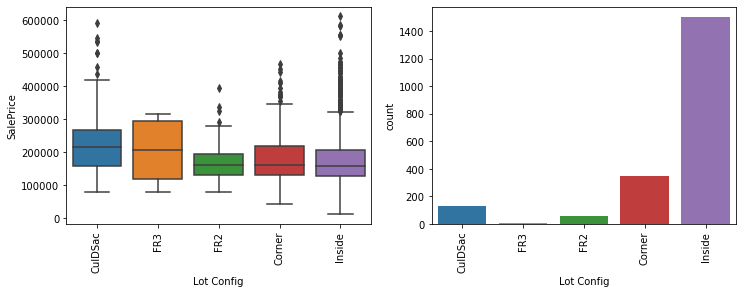

<Figure size 864x360 with 0 Axes>

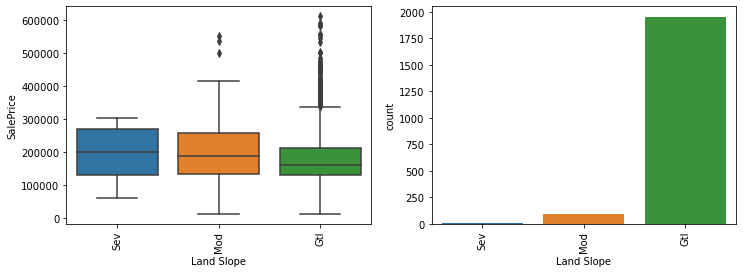

<Figure size 864x360 with 0 Axes>

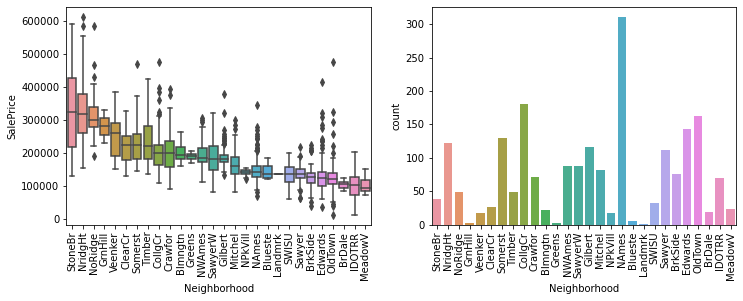

<Figure size 864x360 with 0 Axes>

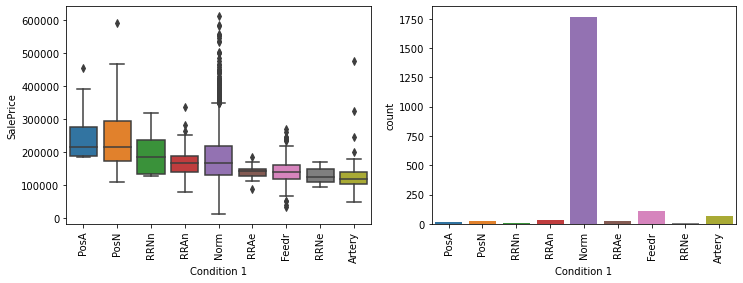

<Figure size 864x360 with 0 Axes>

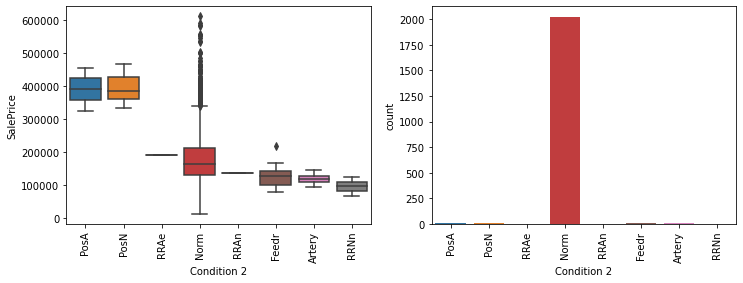

<Figure size 864x360 with 0 Axes>

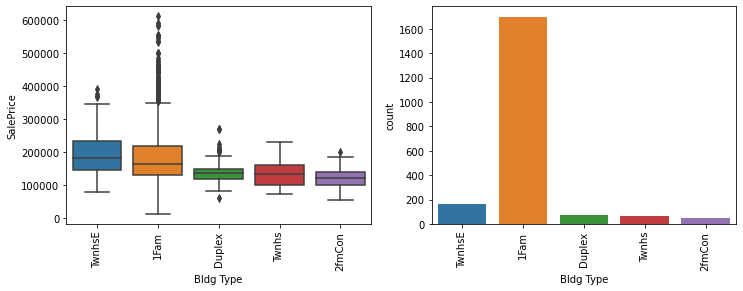

<Figure size 864x360 with 0 Axes>

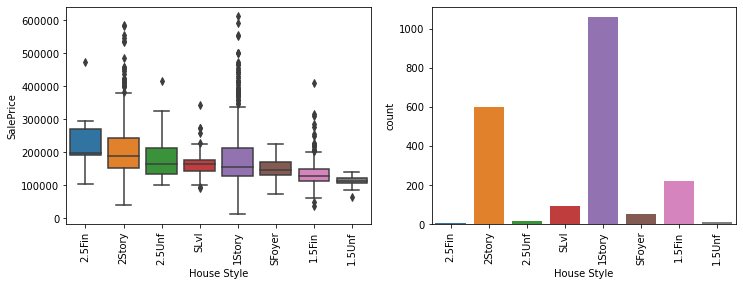

<Figure size 864x360 with 0 Axes>

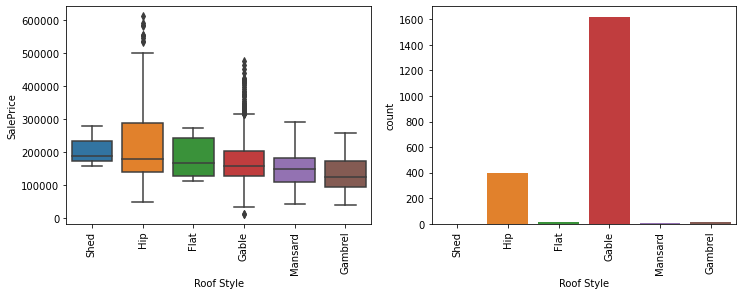

<Figure size 864x360 with 0 Axes>

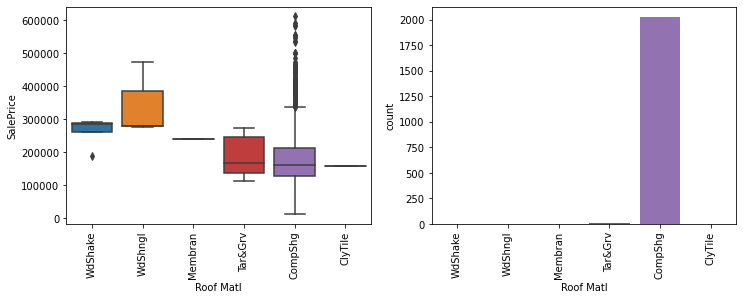

<Figure size 864x360 with 0 Axes>

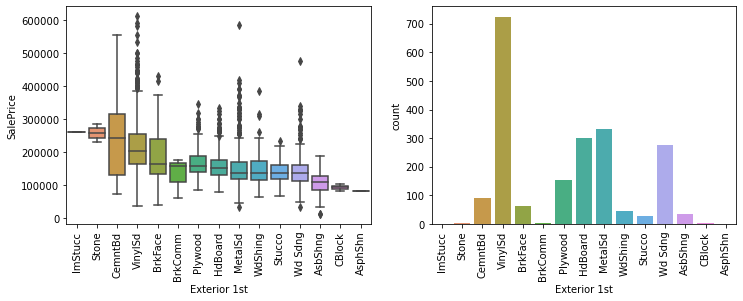

<Figure size 864x360 with 0 Axes>

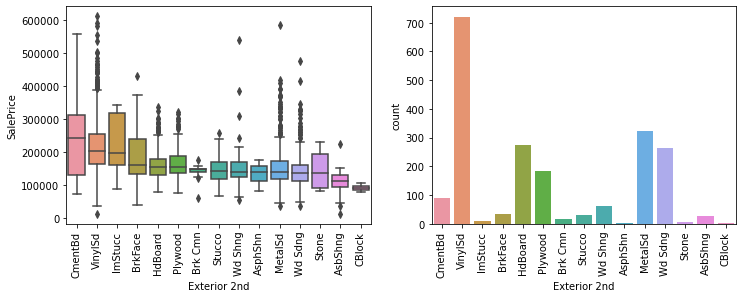

<Figure size 864x360 with 0 Axes>

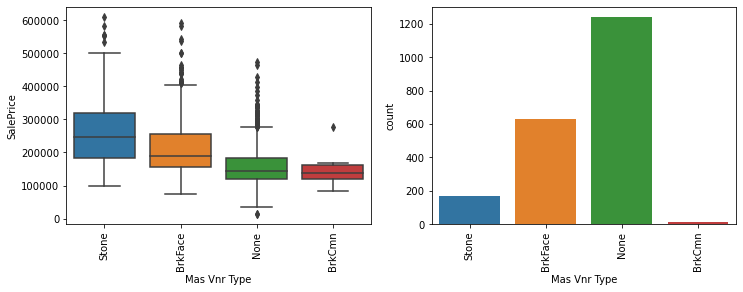

<Figure size 864x360 with 0 Axes>

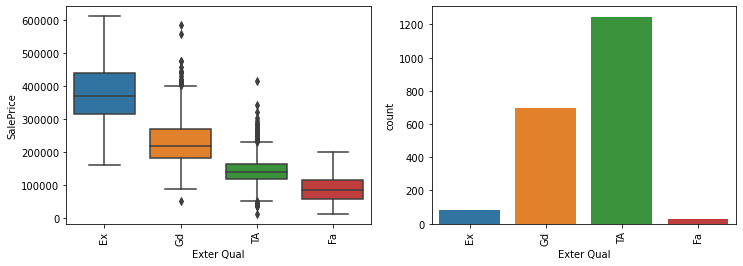

<Figure size 864x360 with 0 Axes>

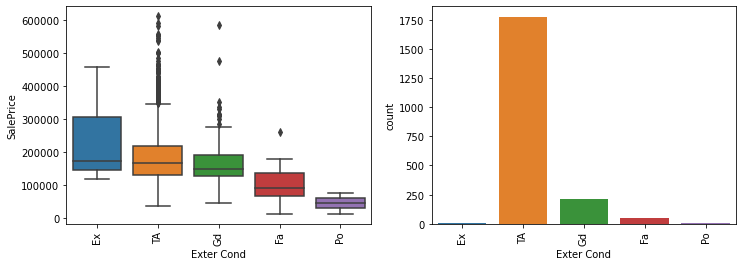

<Figure size 864x360 with 0 Axes>

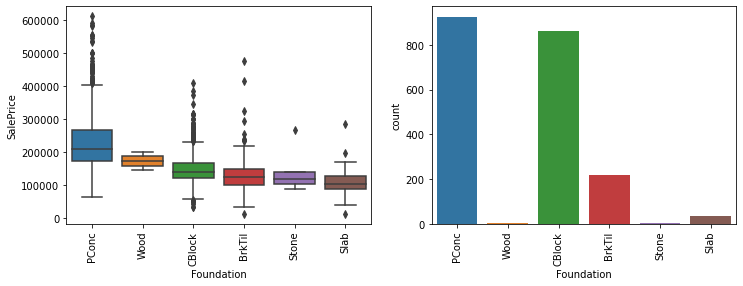

<Figure size 864x360 with 0 Axes>

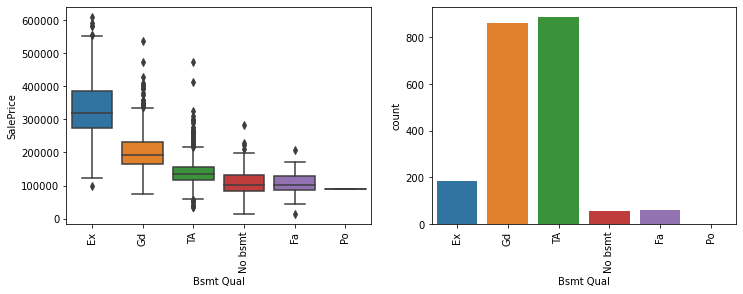

<Figure size 864x360 with 0 Axes>

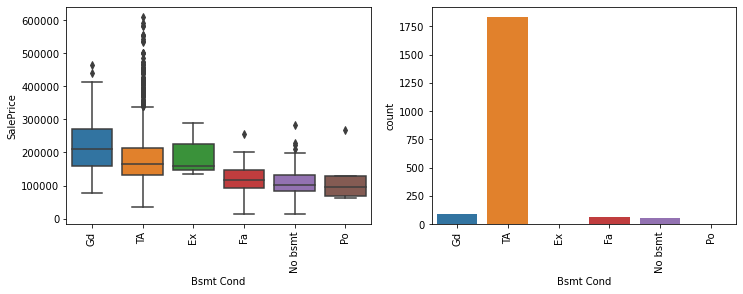

<Figure size 864x360 with 0 Axes>

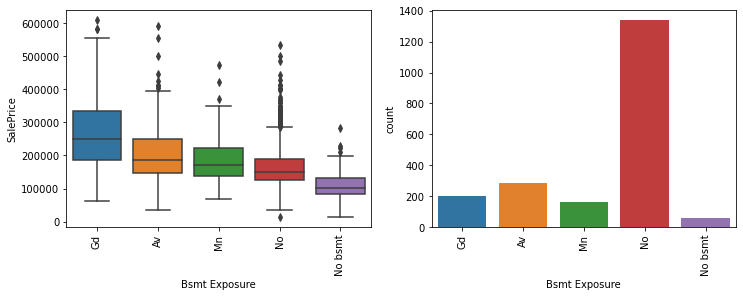

<Figure size 864x360 with 0 Axes>

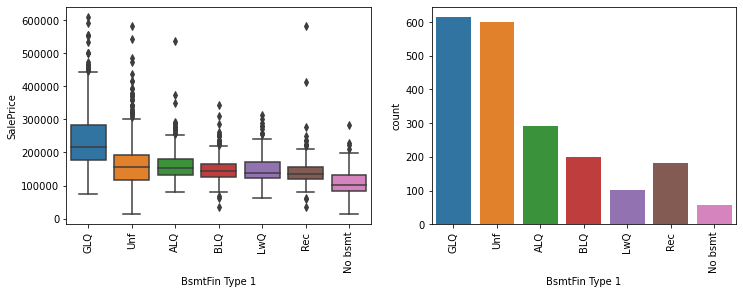

<Figure size 864x360 with 0 Axes>

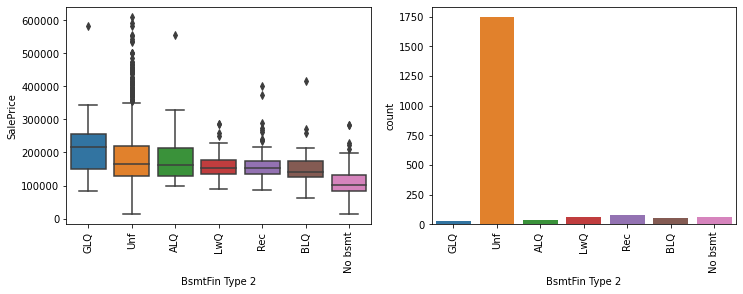

<Figure size 864x360 with 0 Axes>

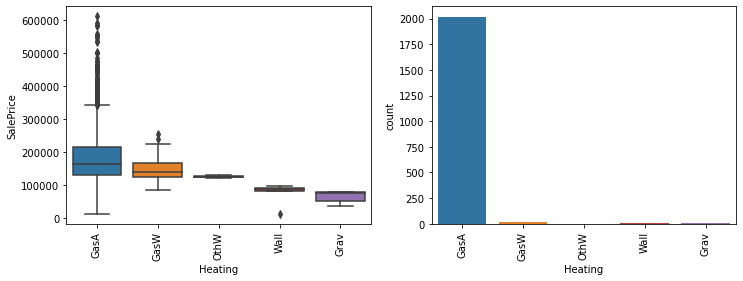

<Figure size 864x360 with 0 Axes>

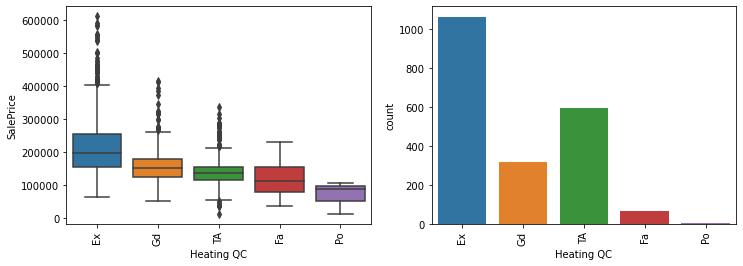

<Figure size 864x360 with 0 Axes>

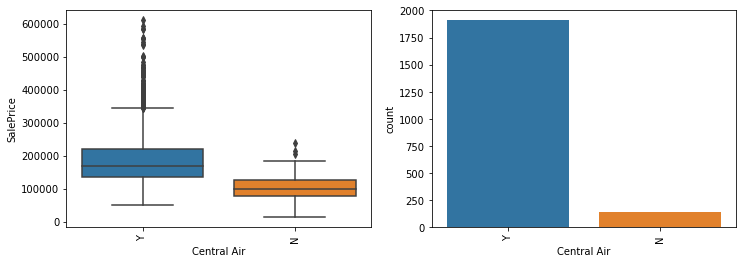

<Figure size 864x360 with 0 Axes>

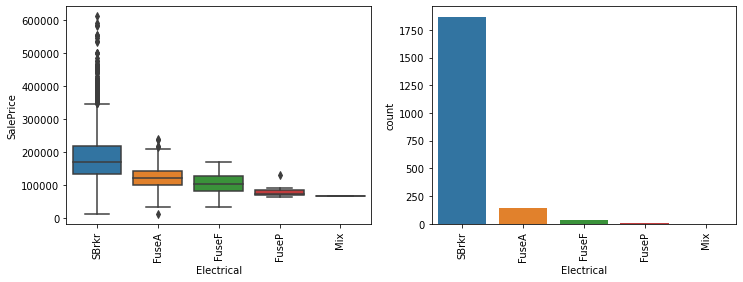

<Figure size 864x360 with 0 Axes>

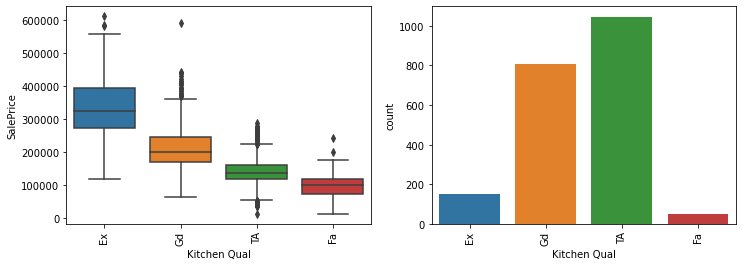

<Figure size 864x360 with 0 Axes>

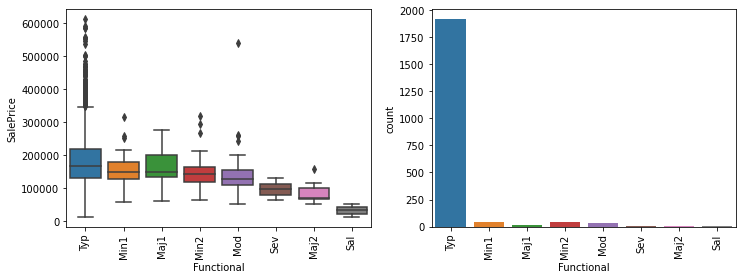

<Figure size 864x360 with 0 Axes>

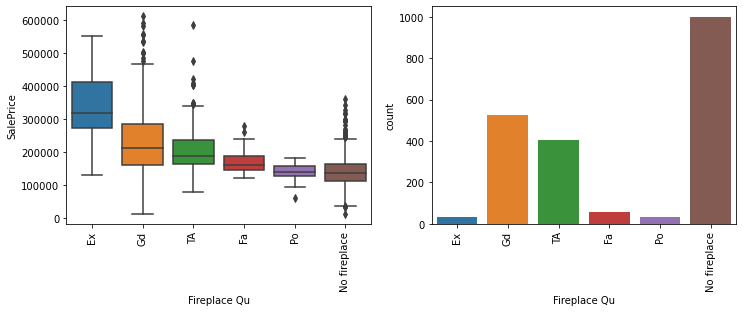

<Figure size 864x360 with 0 Axes>

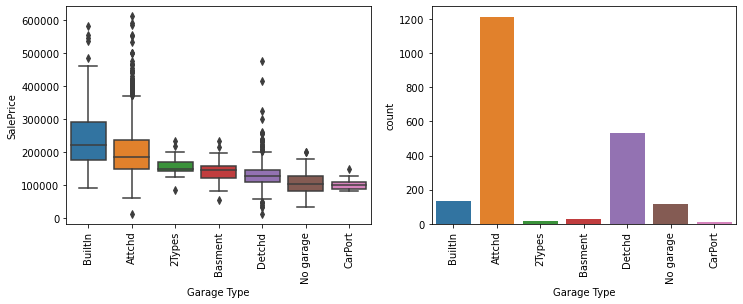

<Figure size 864x360 with 0 Axes>

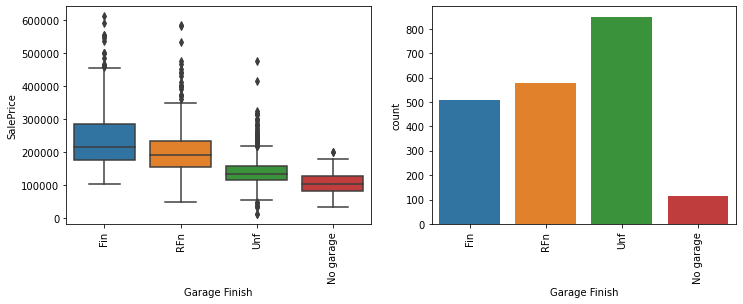

<Figure size 864x360 with 0 Axes>

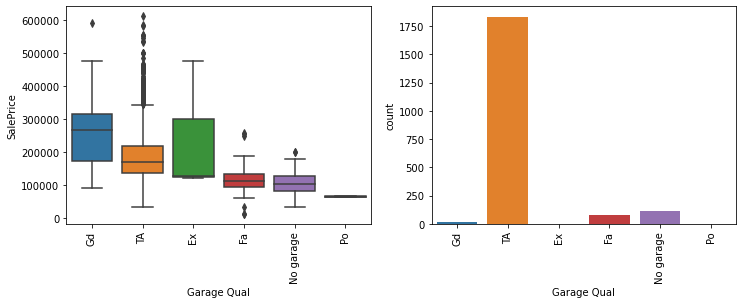

<Figure size 864x360 with 0 Axes>

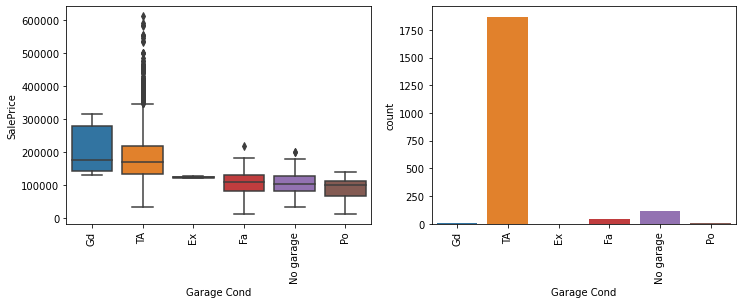

<Figure size 864x360 with 0 Axes>

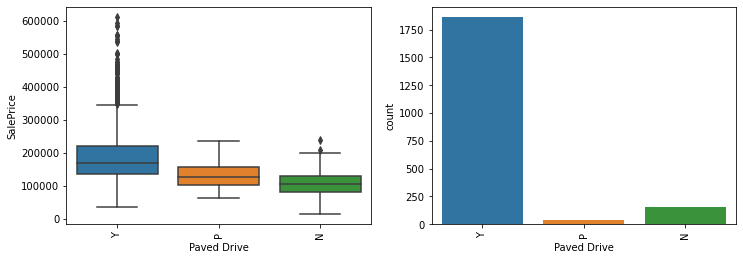

<Figure size 864x360 with 0 Axes>

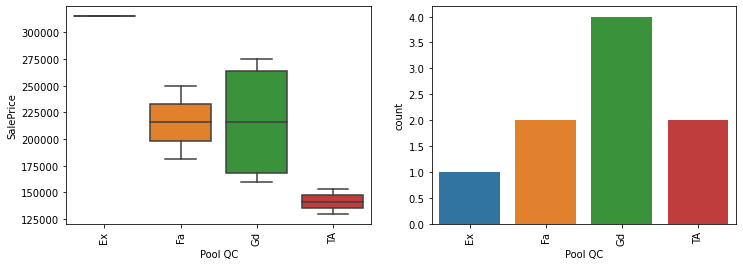

<Figure size 864x360 with 0 Axes>

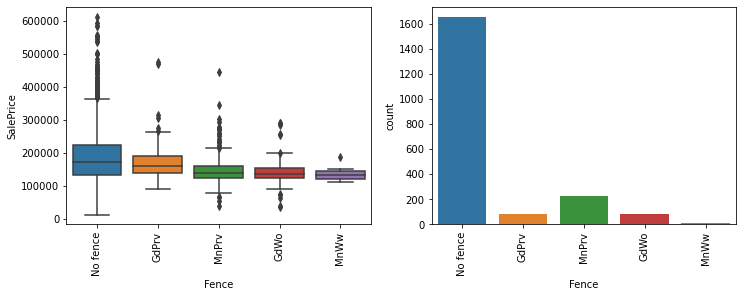

<Figure size 864x360 with 0 Axes>

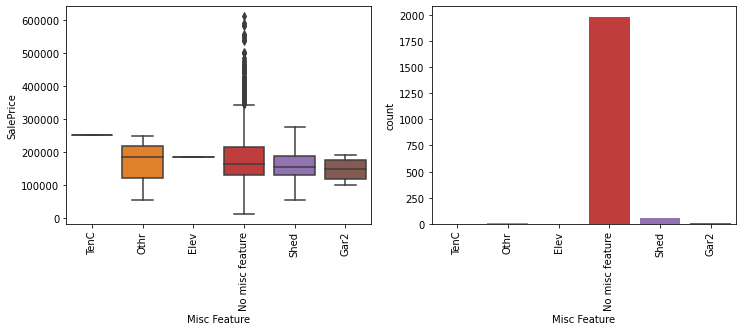

<Figure size 864x360 with 0 Axes>

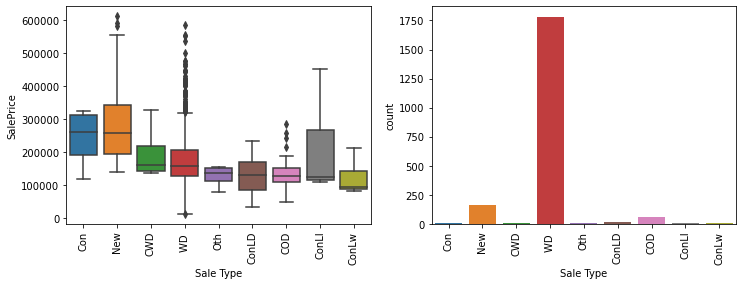

<Figure size 864x360 with 0 Axes>

In [77]:
# For categorical columns, aggregate to at most 4 groups based on relationship with saleprice and count

cat_cols = [col for col in train.columns if train[col].dtype == 'O']
num_cols = [col for col in train.columns if train[col].dtype == 'int64' or train[col].dtype == 'float']

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    plt.figure(figsize=(12,5))
    sns.boxplot(data=train, y='SalePrice', x=col, order=train.groupby(col)['SalePrice'].median().sort_values(ascending=False).index, ax = axes[0])
    sns.countplot(data=train, x = col, order=train.groupby(col)['SalePrice'].median().sort_values(ascending=False).index, ax = axes[1])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

In [78]:
# Minimal aggregation to sync columns between train.csv and test.csv

#train['MS SubClass'] = train['MS SubClass'].apply(lambda x: '85' if x=='150' else x)
#train['MS Zoning'] = train['MS Zoning'].apply(lambda x: 'I (all)' if x=='C (all)' else x)
#train['Neighborhood'] = train['Neighborhood'].apply(lambda x: 'Others' if x in ('GrnHill','Landmrk', 'Blueste') else x)
#train['Exterior 1st'] = train['Exterior 1st'].apply(lambda x: 'Others' if x in ('CBlock', 'ImStucc', 'Stone') else x)
#train['Exterior 2nd'] = train['Exterior 2nd'].apply(lambda x: 'Others' if x in ('Stone') else x)
#train['Bsmt Cond'] = train['Bsmt Cond'].apply(lambda x: 'Gd' if x in ('Fa', 'Po') else x)
#train['Heating QC'] = train['Heating QC'].apply(lambda x: 'Fa' if x in ('Po') else x)
#train['Electrical'] = train['Electrical'].apply(lambda x: 'FuseP' if x in ('Mix') else x)
#train['Functional'] = train['Functional'].apply(lambda x: 'Maj2' if x in ('Sal', 'Sev') else x)
#train['Garage Qual'] = train['Garage Qual'].apply(lambda x: 'Po' if x in ('Fa') else x)

In [79]:
MSSubClass = {'60':'A','120':'A','80':'A','75':'A','20':'B','85':'B','150':'B','70':'B','160':'C','90':'C','50':'C','190':'C','40':'D','45':'D','180':'D','30':'D'}
train['MS SubClass'] = train['MS SubClass'].map(MSSubClass)

MSZoning = {'FV':0,'RL':1}
train['MS Zoning'] = train['MS Zoning'].apply(lambda x: 'FV' if x=='FV' else 'RL' if x=='RL' else 'Others')

train['Lot Shape'] = train['Lot Shape'].apply(lambda x: 'Others' if x=='IR2' or x=='IR3' else x)

train['Lot Config'] = train['Lot Config'].apply(lambda x: 'Others' if x in ('CulDSac', 'FR3', 'FR2') else x)

train['Neighborhood'] = train['Neighborhood'].apply(lambda x: 'A' if x in ('StoneBr', 'NridgHt', 'NoRidge', 'GrnHill') else 'B' if x in ('Veenker', 'ClearCr',
       'Somerst', 'Timber', 'CollgCr', 'Crawfor', 'Blmngtn', 'Greens') else 'C' if x in ('NWAmes', 'SawyerW', 'Gilbert', 'Mitchel', 'NPkVill', 'NAmes',
       'Blueste', 'Landmrk') else 'D')

train['Condition 1'] = train['Condition 1'].apply(lambda x: 'A' if x in ('PosA', 'PosN', 'RRNn', 'RRAn') else 'Norm' if x=='Norm' else 'B')

train['Bldg Type'] = train['Bldg Type'].apply(lambda x: 'TwnhsE' if x == 'TwnhsE' else '1Fam' if x=='1Fam' else 'Others')

train['House Style'] = train['House Style'].apply(lambda x: 'A' if x in ('2.5Fin', '2Story', '2.5Unf') else 'B' if x in ('SLvl', '1Story', 'SFoyer') else 'C')

train['Roof Style'] = train['Roof Style'].apply(lambda x: 'A' if x in ('Shed', 'Hip', 'Flat') else 'Gable' if x=='Gable' else 'B')

train['Exterior 1st'] = train['Exterior 1st'].apply(lambda x: 'A' if x in ('ImStucc', 'Stone', 'CemntBd', 'VinylSd', 'BrkFace') else 'B' if x in ('BrkComm',
       'Plywood', 'HdBoard', 'MetalSd') else 'C')

train['Exterior 2nd'] = train['Exterior 2nd'].apply(lambda x: 'A' if x in ('CmentBd', 'VinylSd') else 'B' if x in ('ImStucc', 'BrkFace', 'HdBoard', 'Plywood',
       'Brk Cmn', 'Stucco', 'Wd Shng') else 'C')

train['Exter Cond'] = train['Exter Cond'].apply(lambda x: 'A' if x in ('Ex', 'TA') else 'B')

train['Foundation'] = train['Foundation'].apply(lambda x: 'A' if x=='PConc' else 'B' if x in ('Wood', 'CBlock') else 'C')

train['Bsmt Qual'] = train['Bsmt Qual'].apply(lambda x: 'Others' if x in ('No bsmt', 'Fa', 'Po') else x)

train['Bsmt Cond'] = train['Bsmt Cond'].apply(lambda x: 'Others' if x in ('Ex', 'Fa', 'No bsmt', 'Po') else x)

train['Bsmt Exposure'] = train['Bsmt Exposure'].apply(lambda x: 'Others' if x in ('Gd', 'Av', 'Mn') else x)

train['BsmtFin Type 1'] = train['BsmtFin Type 1'].apply(lambda x: 'Others' if x in ('ALQ', 'BLQ', 'LwQ', 'Rec', 'No bsmt') else x)

train['BsmtFin Type 2'] = train['BsmtFin Type 2'].apply(lambda x: 'Others' if x != 'Unf' else x)

train['Heating QC'] = train['Heating QC'].apply(lambda x: 'Others' if x != 'Ex' and x!= 'Gd' else x)

train['Electrical'] = train['Electrical'].apply(lambda x: 'Others' if x != 'SBrkr' else x)

train['Functional'] = train['Functional'].apply(lambda x: 'Others' if x != 'Typ' else x)

train['Fireplace Qu'] = train['Fireplace Qu'].apply(lambda x: 'A' if x in ('Ex', 'Gd') else 'B' if x in ('TA', 'Fa', 'Po') else x)

train['Garage Type'] = train['Garage Type'].apply(lambda x: 'A' if x in ('BuiltIn', 'Attchd') else 'B')

train['Garage Qual'] = train['Garage Qual'].apply(lambda x: 'A' if x in ('Gd', 'TA') else 'B')

train['Garage Cond'] = train['Garage Cond'].apply(lambda x: 'A' if x in ('Gd', 'TA') else 'B')

train['Fence'] = train['Fence'].apply(lambda x: 'Others' if x != 'No fence' else x)

In [80]:
# Feature engineering

train['Age sold'] = train.apply(lambda x: 0 if x['Yr Sold'] <= x['Year Built'] else x['Yr Sold'] - x['Year Built'], axis = 1)
train['Age remodelled'] = train.apply(lambda x: x['Year Remod/Add'] - x['Year Built'] if x['Year Built'] < x['Year Remod/Add'] else 0, axis = 1)

# Drop unwanted columns
fields_to_drop = [
    'Id', # useless
    'PID', # useless
    'Year Built', # Replaced with Age sold
    'Year Remod/Add', # Replaced with Age remodelled
    'Garage Yr Blt', # Difficult to handle as some houses do not have garages. Cannot impute 0
    'Pool Area', # only 8 houses have pools
    'Pool QC', # only 8 houses have pools
    'Sale Type', # details of sale should not affect sale price
    'Utilities', # mostly 1 value
    'Condition 2', # mostly 1 value
    'Roof Matl', # mostly 1 value
    'Heating', # mostly 1 value
    'Misc Feature', # mostly 1 value
    'Misc Val'
]
train.drop(fields_to_drop, axis = 1, inplace=True)

<ipython-input-81-fc87b7f771e5>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2, figsize=(12,4))


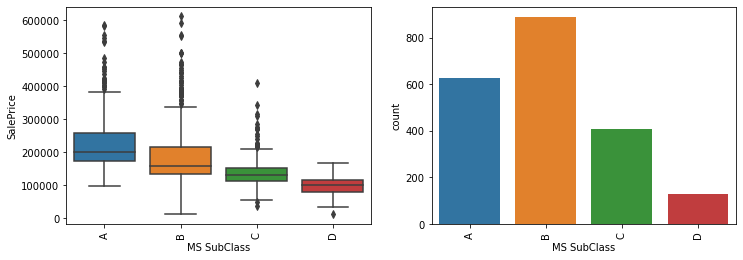

<Figure size 864x360 with 0 Axes>

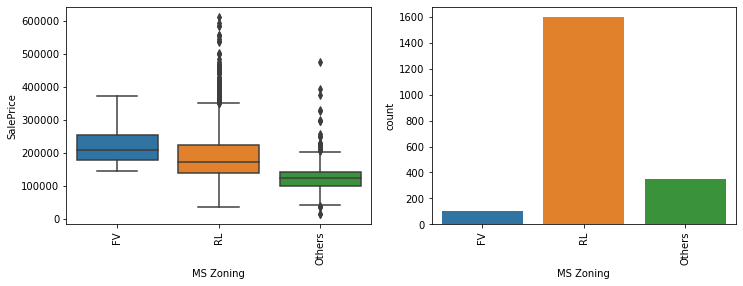

<Figure size 864x360 with 0 Axes>

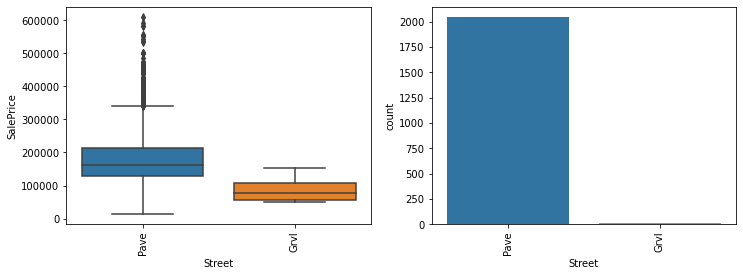

<Figure size 864x360 with 0 Axes>

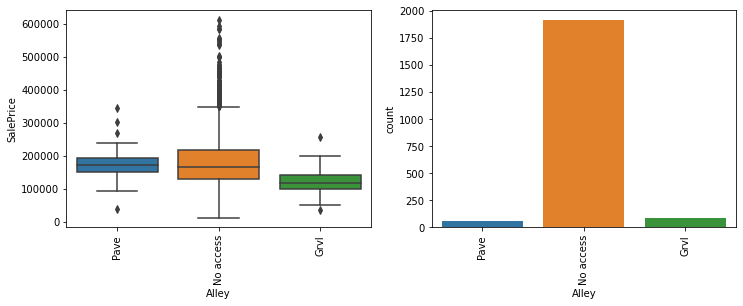

<Figure size 864x360 with 0 Axes>

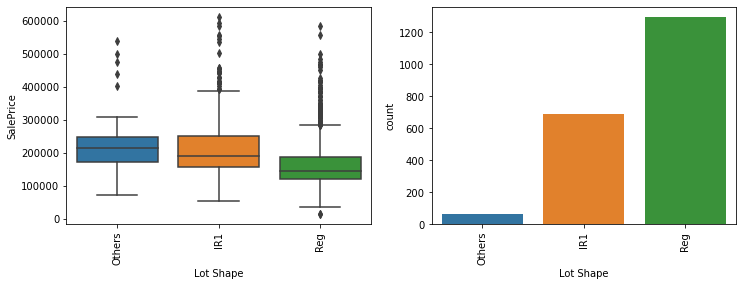

<Figure size 864x360 with 0 Axes>

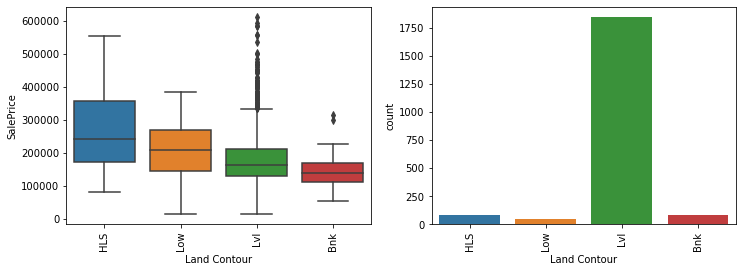

<Figure size 864x360 with 0 Axes>

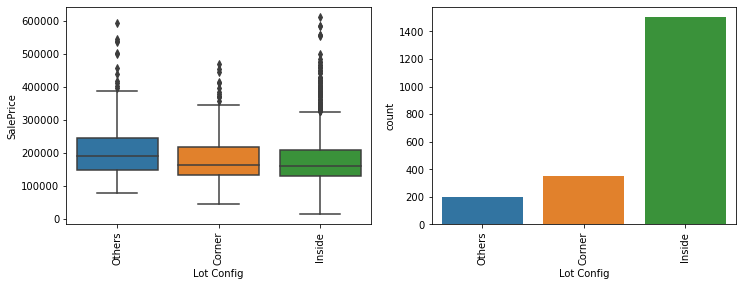

<Figure size 864x360 with 0 Axes>

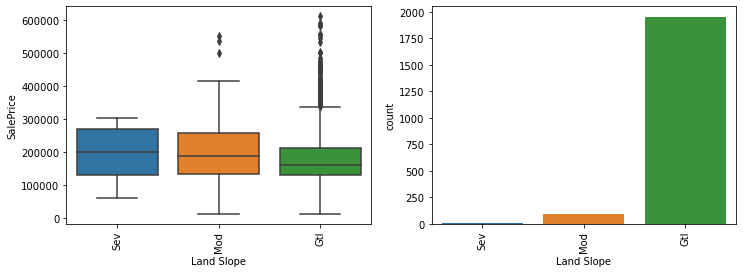

<Figure size 864x360 with 0 Axes>

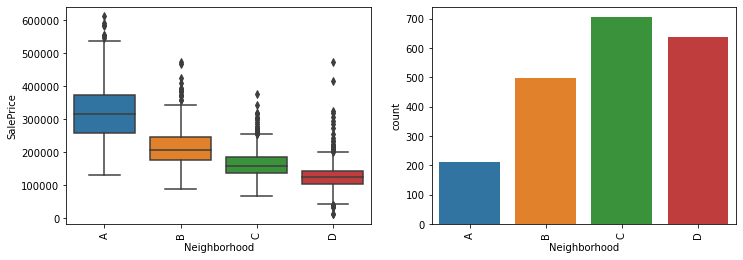

<Figure size 864x360 with 0 Axes>

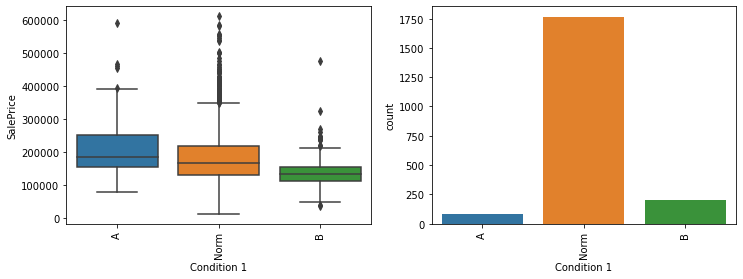

<Figure size 864x360 with 0 Axes>

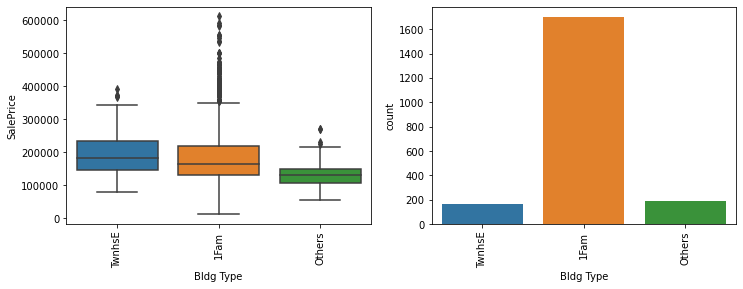

<Figure size 864x360 with 0 Axes>

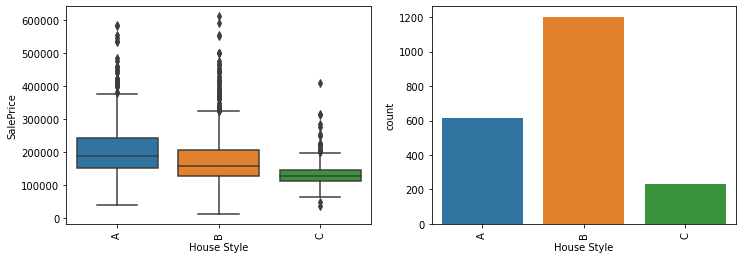

<Figure size 864x360 with 0 Axes>

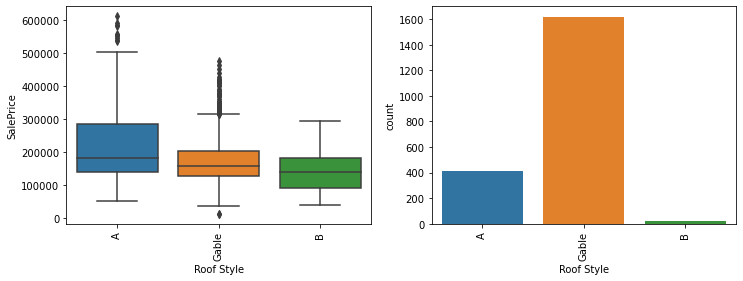

<Figure size 864x360 with 0 Axes>

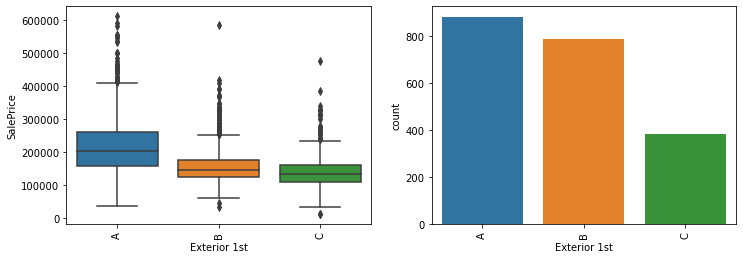

<Figure size 864x360 with 0 Axes>

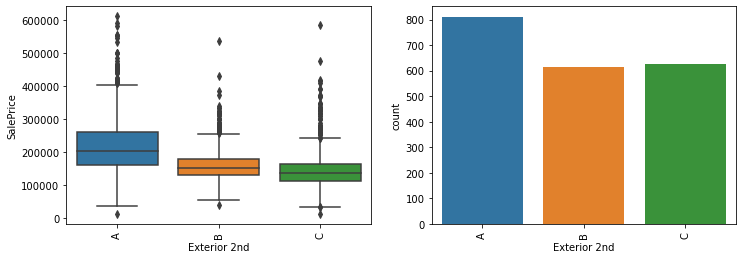

<Figure size 864x360 with 0 Axes>

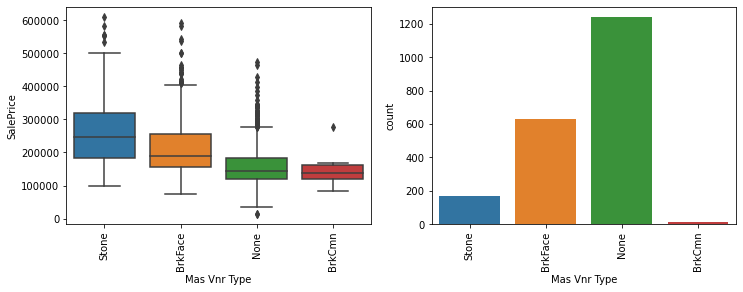

<Figure size 864x360 with 0 Axes>

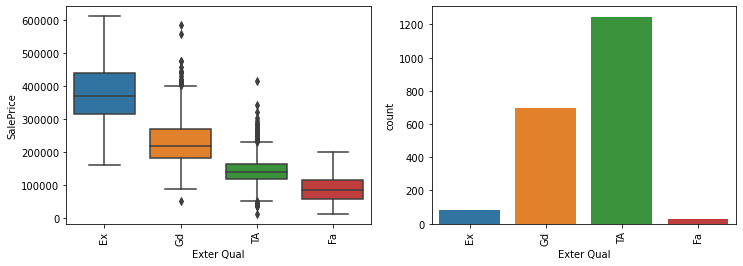

<Figure size 864x360 with 0 Axes>

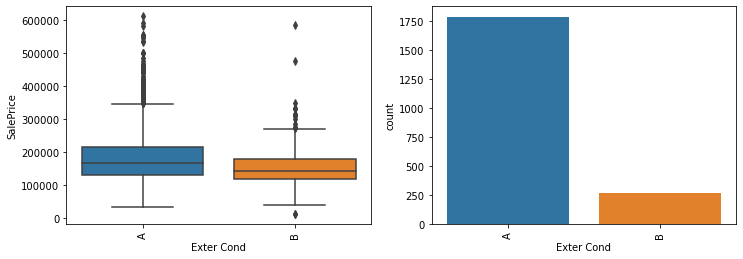

<Figure size 864x360 with 0 Axes>

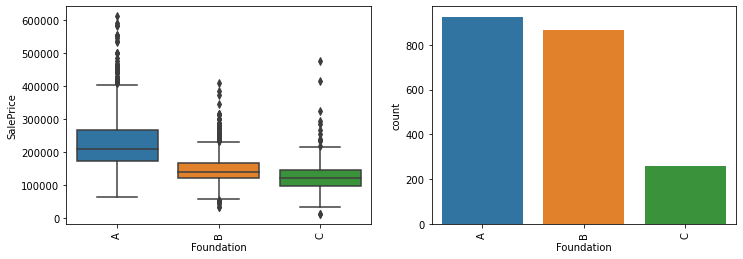

<Figure size 864x360 with 0 Axes>

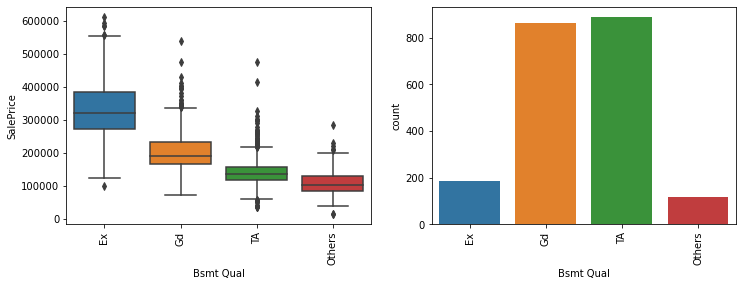

<Figure size 864x360 with 0 Axes>

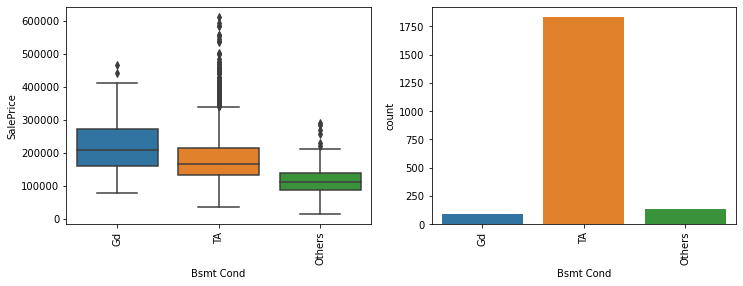

<Figure size 864x360 with 0 Axes>

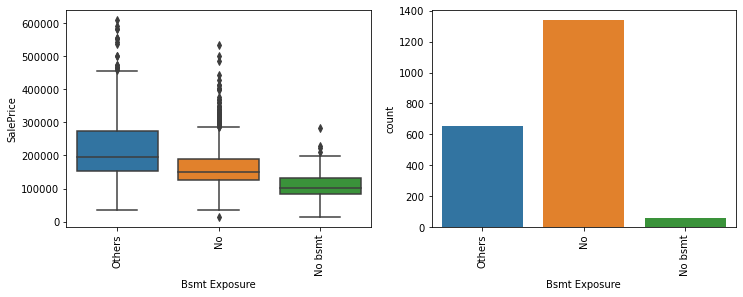

<Figure size 864x360 with 0 Axes>

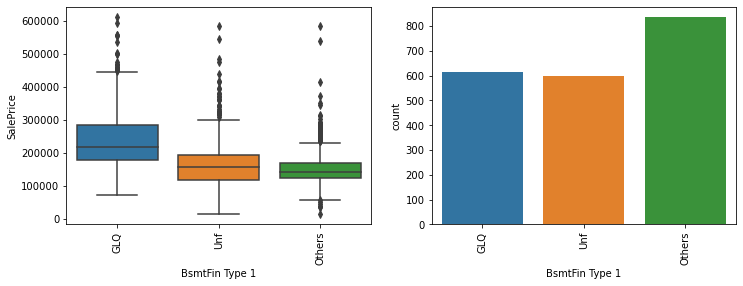

<Figure size 864x360 with 0 Axes>

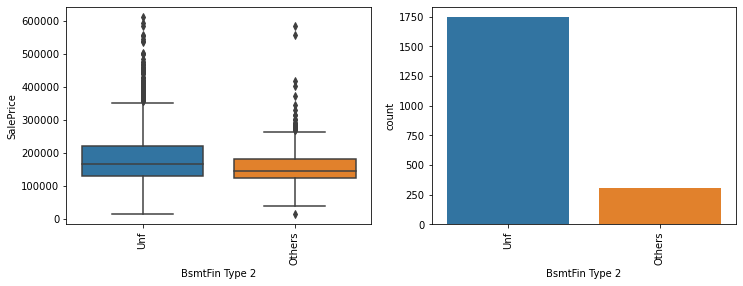

<Figure size 864x360 with 0 Axes>

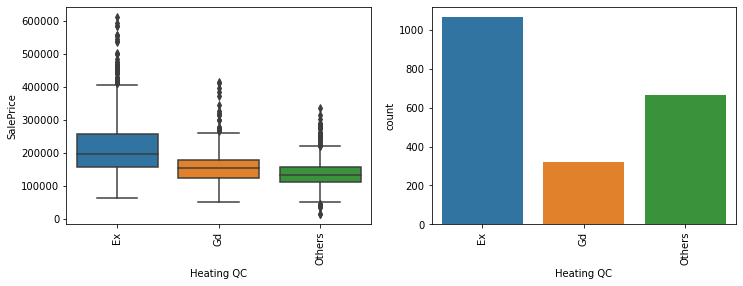

<Figure size 864x360 with 0 Axes>

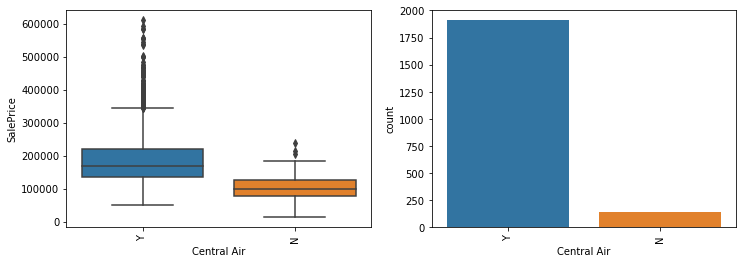

<Figure size 864x360 with 0 Axes>

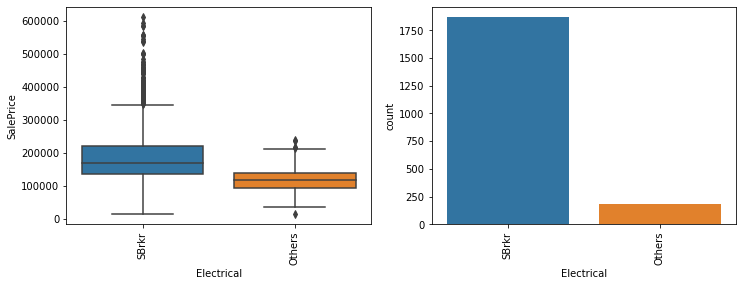

<Figure size 864x360 with 0 Axes>

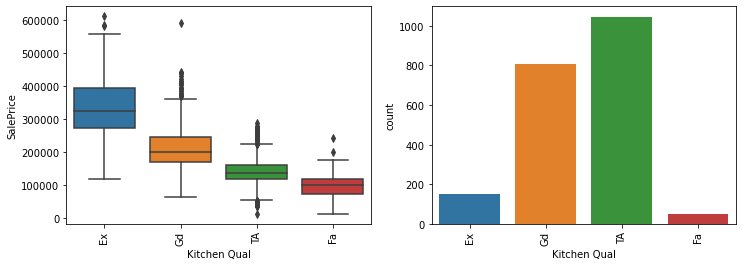

<Figure size 864x360 with 0 Axes>

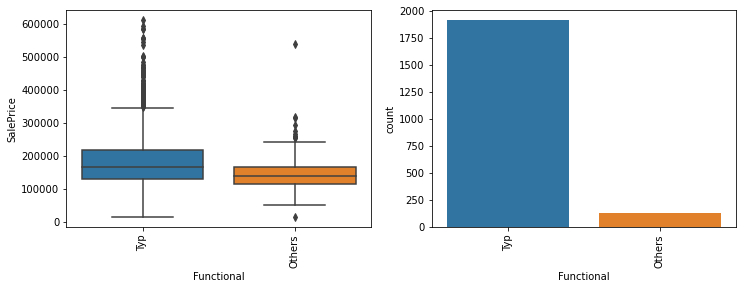

<Figure size 864x360 with 0 Axes>

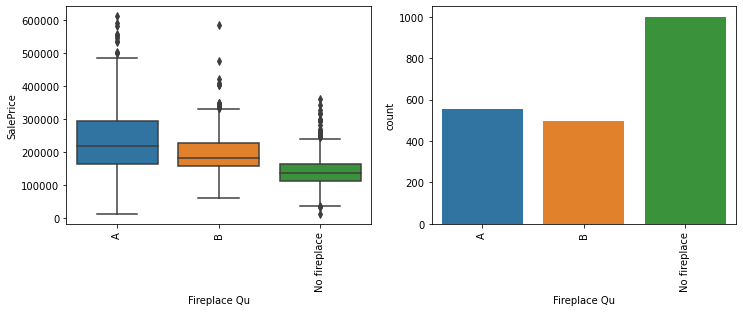

<Figure size 864x360 with 0 Axes>

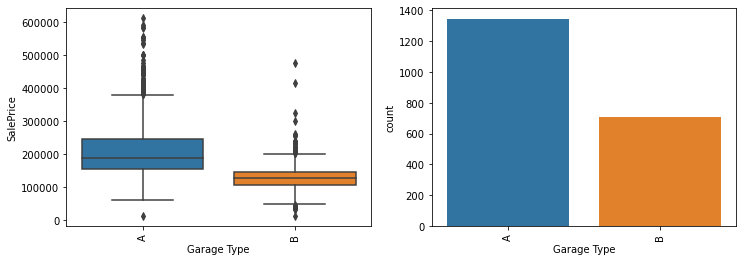

<Figure size 864x360 with 0 Axes>

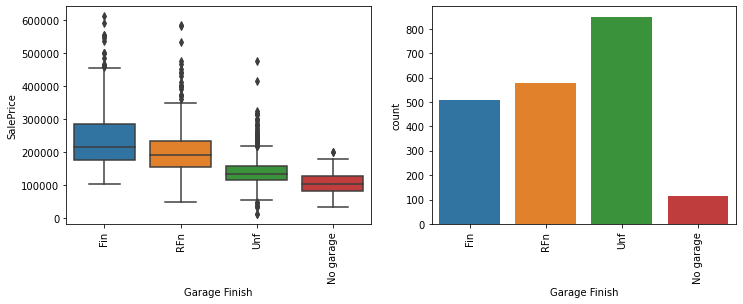

<Figure size 864x360 with 0 Axes>

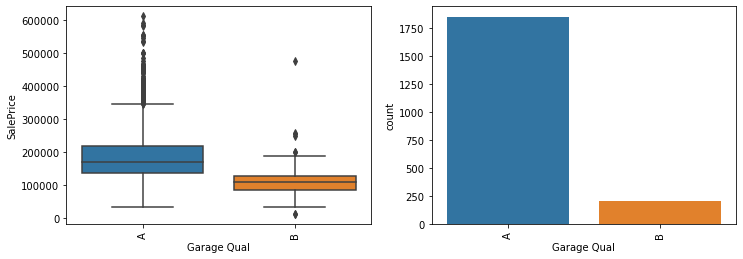

<Figure size 864x360 with 0 Axes>

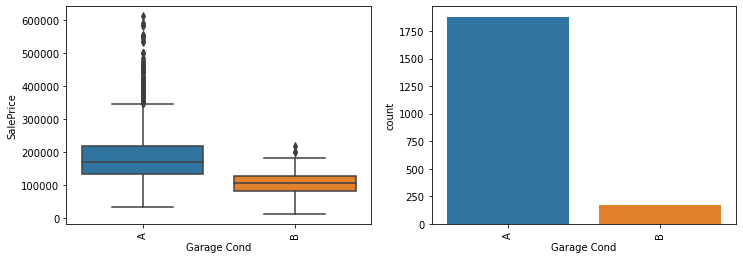

<Figure size 864x360 with 0 Axes>

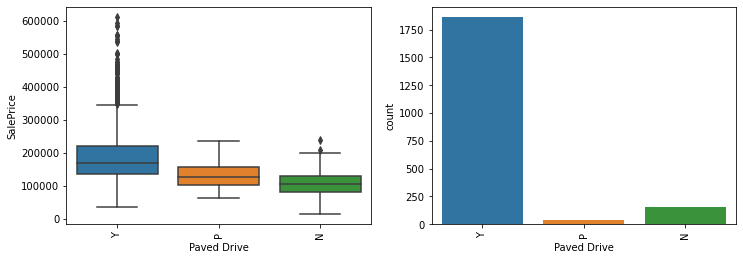

<Figure size 864x360 with 0 Axes>

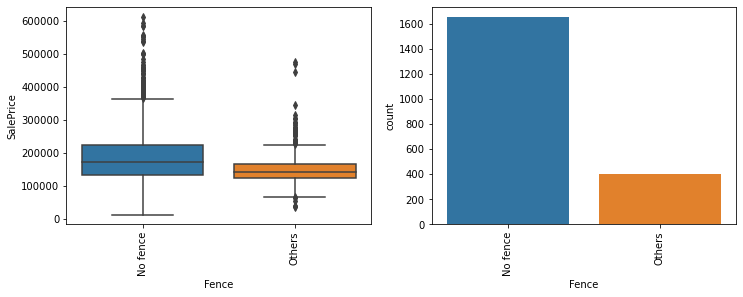

<Figure size 864x360 with 0 Axes>

In [81]:
# Review relationship of categorical variables vs saleprice again

cat_cols = [col for col in train.columns if train[col].dtype == 'O']
num_cols = [col for col in train.columns if train[col].dtype == 'int64' or train[col].dtype == 'float']

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    plt.figure(figsize=(12,5))
    sns.boxplot(data=train, y='SalePrice', x=col, order=train.groupby(col)['SalePrice'].median().sort_values(ascending=False).index, ax = axes[0])
    sns.countplot(data=train, x = col, order=train.groupby(col)['SalePrice'].median().sort_values(ascending=False).index, ax = axes[1])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

### Check quality of numerical columns

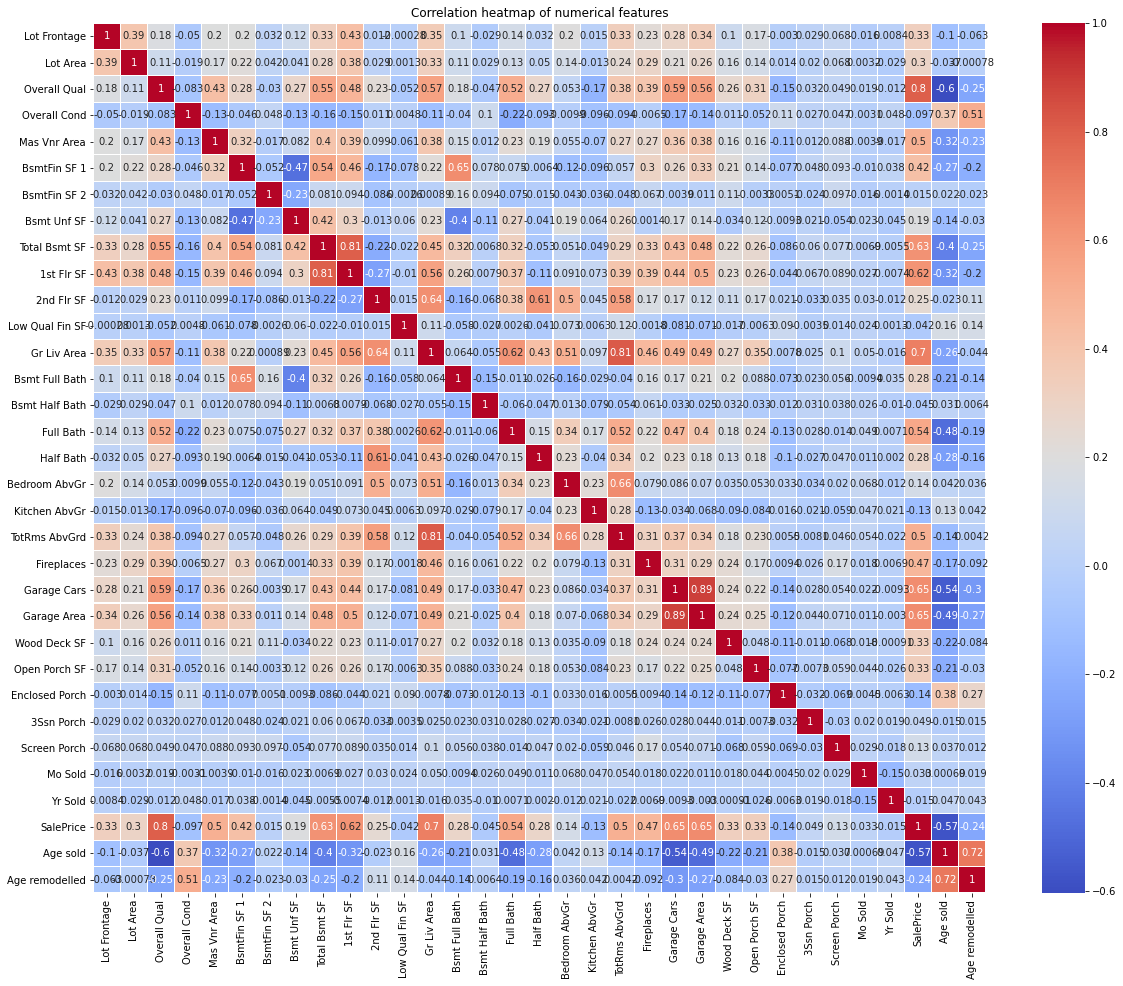

In [82]:
plt.figure(figsize=(20,16))
sns.heatmap(train[num_cols].corr(), annot=True, linewidth=.02, cmap='coolwarm')
plt.title('Correlation heatmap of numerical features')
plt.savefig('Charts/num_col_heatmap.jpg', bbox_inches='tight')

<font color='blue'> Quite a number of features are correlated - need to use regularisation and interaction terms

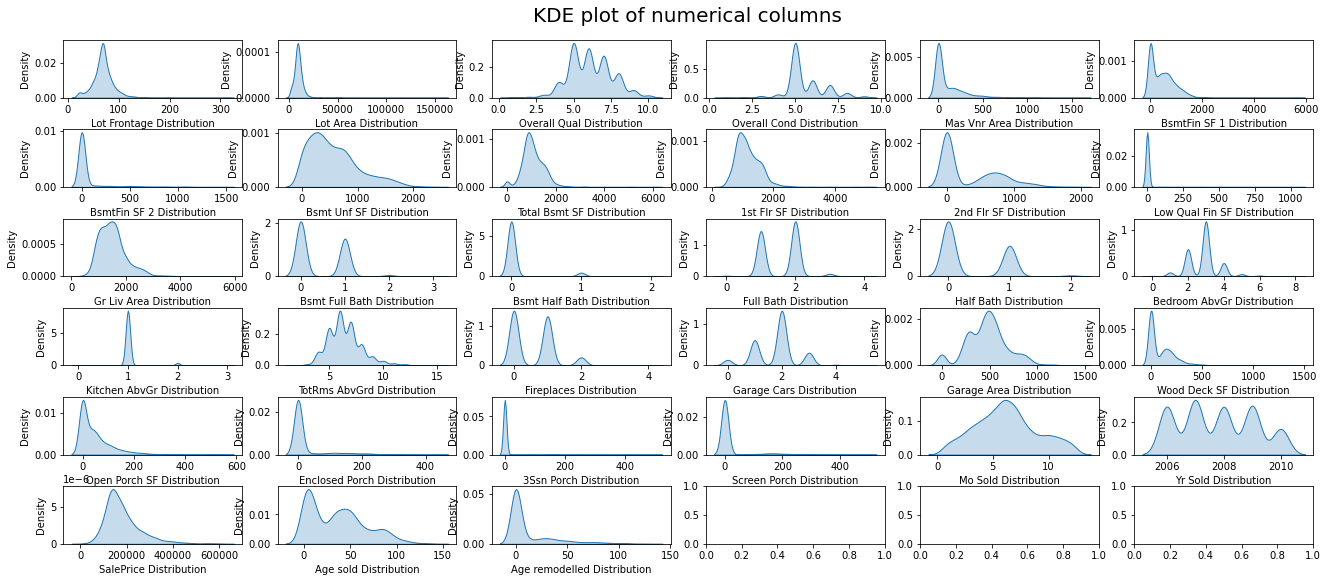

In [83]:
# Plot histogram of each numerical column

fig, axes = plt.subplots(6,6, figsize=(18, 8));
plt.subplots_adjust(hspace = 1, wspace=0.2)
fig.suptitle('KDE plot of numerical columns', fontsize=20)
plt.tight_layout()

for i,col in zip(range(36),num_cols):
    sns.kdeplot(train[col], ax=axes[i//6][i%6], fill=True);
    axes[i//6][i%6].set_xlabel(col+' Distribution')

fig.savefig('./Charts/num_cols_kde.jpg', bbox_inches='tight')

<font color='blue'> While some variables are heavily skewed. This may not be a problem depending on the residual distribution. We will come back and visit this if necessary if the residual distribution is not normal. We will also drop 3Ssn Porch variable as it is most 0.

In [84]:
train.drop(['3Ssn Porch'], axis = 1, inplace=True)

cat_cols = [col for col in train.columns if train[col].dtype == 'O']
num_cols = [col for col in train.columns if train[col].dtype == 'int64' or train[col].dtype == 'float']

# Exploratory Data Analysis

 ##### [Back to Contents](#Contents:)

In [85]:
train.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice        1.000000
Overall Qual     0.800207
Gr Liv Area      0.697038
Garage Area      0.649897
Garage Cars      0.647781
Total Bsmt SF    0.625775
1st Flr SF       0.618486
Full Bath        0.537969
TotRms AbvGrd    0.504014
Mas Vnr Area     0.503579
Name: SalePrice, dtype: float64

<font color='blue'> The top 5 variables correlated with SalePrice is Overall Qual, Gr Liv Area, Garage Area, Garage Cars and Total Bsmt SF. Are they correlated?

In [86]:
train[['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF']].corr()

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF
SalePrice,1.000000,0.800207,0.697038,0.649897,0.647781,0.625775
Overall Qual,0.800207,1.000000,0.566701,0.563904,0.587447,0.545175
Gr Liv Area,0.697038,0.566701,1.000000,0.489620,0.485166,0.451619
Garage Area,0.649897,0.563904,0.489620,1.000000,0.893442,0.483672
Garage Cars,0.647781,0.587447,0.485166,0.893442,1.000000,0.428553
Total Bsmt SF,0.625775,0.545175,0.451619,0.483672,0.428553,1.000000


<font color='blue'> No strong correlation between any 2 variables except Garage Area-Garage Cars, which make sense, since a larger garage area can hold more cars, and that would be the main reason why people would buy a garage area.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

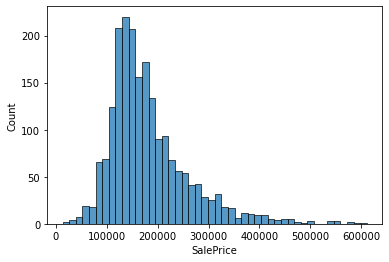

In [87]:
sns.histplot(data=train, x='SalePrice')

<font color='blue'> Slight skew, but may not be an issue.

# Model Preprocessing

 ##### [Back to Contents](#Contents:)

In [88]:
# Split into X and y

X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

# Dummify categorical variables
X_dummy = pd.get_dummies(X, drop_first=True, columns=cat_cols)

# Add interaction terms

poly = PolynomialFeatures(interaction_only=True, include_bias=False).fit(X_dummy)
X_poly = poly.transform(X_dummy)

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Scale data

ss = StandardScaler()
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1845, 5151)
(206, 5151)
(1845,)
(206,)


In [90]:
# Create list of column dictionary to match coefficients later on

col_map = {'x'+str(i): col for i,col in enumerate(X_dummy.columns)}

col_dict_df = pd.DataFrame({'combi':poly.get_feature_names()})
col_dict_df['first_term'] = col_dict_df['combi'].str.split(' ').str[0].map(col_map)
col_dict_df['second_term'] = col_dict_df['combi'].str.split(' ').str[1].map(col_map)
col_dict_df['combined_term'] = col_dict_df.apply(lambda x: x['first_term'] + '-' + x['second_term'] if pd.notna(x['second_term']) else x['first_term'], axis=1)

col_dict_df.shape

(5151, 4)

# Baseline Model Fitting

 ##### [Back to Contents](#Contents:)

In [91]:
# Find baseline score with Linear Regression and mean

lr = LinearRegression()

lr.fit(X_train, y_train)
print(f'{lr} train score: {lr.score(X_train, y_train)}')
print(f'{lr} test score: {lr.score(X_test, y_test)}')
print(f'{lr} train rmse: {mse(y_pred=lr.predict(X_train), y_true=y_train, squared=False)}')
print(f'{lr} test rmse: {mse(y_pred=lr.predict(X_test), y_true=y_test, squared=False)}')
print('\n---------------------')

print(f'Baseline using mean train score: {r2_score(y_true = y_train, y_pred = np.full(len(y_train), np.mean(y_train)))}')
print(f'Baseline using mean test score: {r2_score(y_true = y_test, y_pred = np.full(len(y_test), np.mean(y_train)))}')
print(f'Baseline using mean train rmse: {mse(y_pred=np.full(len(y_train), np.mean(y_train)), y_true=y_train, squared=False)}')
print(f'Baseline using mean test rmse: {mse(y_pred=np.full(len(y_test), np.mean(y_test)), y_true=y_test, squared=False)}')

LinearRegression() train score: 0.9999993138158464
LinearRegression() test score: -2129649878509135.5
LinearRegression() train rmse: 65.84879434972856
LinearRegression() test rmse: 3540822591065.514

---------------------
Baseline using mean train score: 0.0
Baseline using mean test score: -0.005953911936618761
Baseline using mean train rmse: 79492.74343105893
Baseline using mean test rmse: 76727.32591779814


<font color='blue'> As expected, the Linear Regression model performed poorly due to severe overfitting. The null model fare badly as well

# Model Selection

 ##### [Back to Contents](#Contents:)

### Ridge

In [92]:
# Ridge

print(f'Start time: {datetime.datetime.now().time()}')

ridgecv = RidgeCV(alphas = np.logspace(3,4,100), cv=5).fit(X_train, y_train)
print(f'Ridge CV best alpha: {ridgecv.alpha_}')
print(f'Ridge CV best score: {ridgecv.best_score_}')
print(f'Ridge CV train score: {ridgecv.score(X_train, y_train)}')
print(f'Ridge CV test score: {ridgecv.score(X_test, y_test)}')
print(f'Ridge CV train rmse: {mse(y_pred=ridgecv.predict(X_train), y_true=y_train, squared=False)}')
print(f'Ridge CV test rmse: {mse(y_pred=ridgecv.predict(X_test), y_true=y_test, squared=False)}')

print(f'End time: {datetime.datetime.now().time()}')

# Fitting back to Ridge() gives the same results

Start time: 23:07:19.563315
Ridge CV best alpha: 2364.4894126454074
Ridge CV best score: 0.8753511367524585
Ridge CV train score: 0.9594242867447472
Ridge CV test score: 0.9259621481197385
Ridge CV train rmse: 16012.552507483264
Ridge CV test rmse: 20877.426692200203
End time: 23:09:11.429698


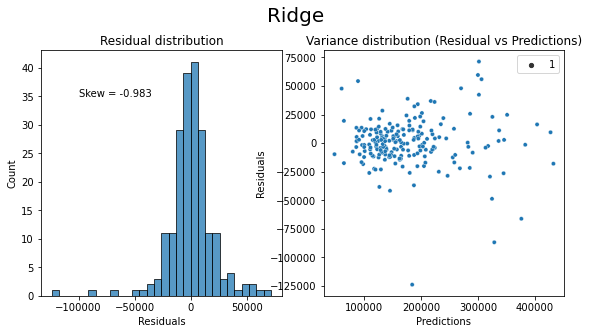

In [93]:
# Test ridge assumptions

fig, axes = plt.subplots(1, 2,figsize=(8,4))
plt.tight_layout()
fig.suptitle('Ridge', y=1.1, fontsize=20)

# Residual Normality

residuals = ridgecv.predict(X_test) - y_test
sns.histplot(residuals, bins=30, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-100000, y=35, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance

sns.scatterplot(x=ridgecv.predict(X_test), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

fig.savefig('./Charts/ridge_residual.jpg', bbox_inches='tight')

<font color='blue'> Skew of the residuals is reasonable with no discernible pattern, hence we conclude that linear assumptions are met

### Lasso

In [94]:
# Lasso

print(f'Start time: {datetime.datetime.now().time()}')

lassocv = LassoCV(alphas = np.linspace(300,700,100), cv=5).fit(X_train, y_train)
print(f'Lasso CV best alpha: {lassocv.alpha_}')
print(f'Lasso CV train score: {lassocv.score(X_train, y_train)}')
print(f'Lasso CV test score: {lassocv.score(X_test, y_test)}')
print(f'Lasso CV train rmse: {mse(y_pred=lassocv.predict(X_train), y_true=y_train, squared=False)}')
print(f'Lasso CV test rmse: {mse(y_pred=lassocv.predict(X_test), y_true=y_test, squared=False)}')

print(f'End time: {datetime.datetime.now().time()}')

Start time: 23:09:11.972299
Lasso CV best alpha: 497.979797979798
Lasso CV train score: 0.9568874949209919
Lasso CV test score: 0.9288341043969233
Lasso CV train rmse: 16505.51633625022
Lasso CV test rmse: 20468.500229034053
End time: 23:10:51.838191


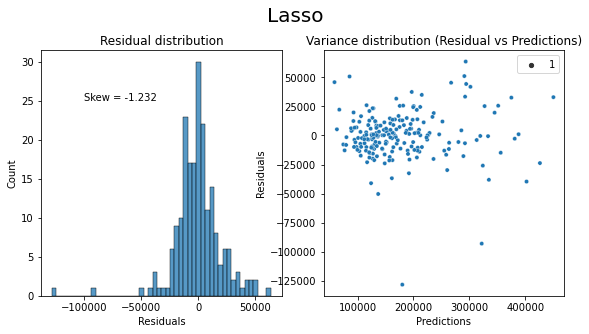

In [28]:
# Test lasso assumptions

fig, axes = plt.subplots(1, 2,figsize=(8,4))
plt.tight_layout()
fig.suptitle('Lasso', y=1.1, fontsize=20)

# Residual Normality

residuals = lassocv.predict(X_test) - y_test
sns.histplot(residuals, bins=50, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-100000, y=25, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance

sns.scatterplot(x=lassocv.predict(X_test), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

fig.savefig('./Charts/lasso_residual.jpg', bbox_inches='tight')

<font color='blue'> Skew of the residuals is reasonable with no discernible pattern, hence we conclude that linear assumptions are met

### ElasticNet

In [29]:
# ElasticNet

print(f'Start time: {datetime.datetime.now().time()}')

enetcv = ElasticNetCV(alphas = np.linspace(1,1000,100), cv=5, l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01).fit(X_train, y_train)
print(f'Elasticnet CV best alpha: {enetcv.alpha_}')
print(f'Elasticnet CV best l1 ratio: {enetcv.l1_ratio_}')
print(f'Elasticnet CV train score: {enetcv.score(X_train, y_train)}')
print(f'Elasticnet CV test score: {enetcv.score(X_test, y_test)}')
print(f'Elasticnet CV train rmse: {mse(y_pred=enetcv.predict(X_train), y_true=y_train, squared=False)}')
print(f'Elasticnet CV test rmse: {mse(y_pred=enetcv.predict(X_test), y_true=y_test, squared=False)}')

print(f'End time: {datetime.datetime.now().time()}')

Start time: 22:52:46.941525


C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266000616050.97327, tolerance: 93042098188.96701
  model = cd_fast.enet_coordinate_descent(
C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264171115417.84662, tolerance: 96059550524.85666
  model = cd_fast.enet_coordinate_descent(
C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257417986450.4339, tolerance: 91813675816.90138
  model = cd_fast.enet_coordinate_descent(
C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

Elasticnet CV best alpha: 31.272727272727273
Elasticnet CV best l1 ratio: 0.95
Elasticnet CV train score: 0.9551105791805161
Elasticnet CV test score: 0.9253990527851599
Elasticnet CV train rmse: 16842.225836658097
Elasticnet CV test rmse: 20956.66800811026
End time: 22:59:47.928900


C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389802941461.55695, tolerance: 116587325963.71922
  model = cd_fast.enet_coordinate_descent(


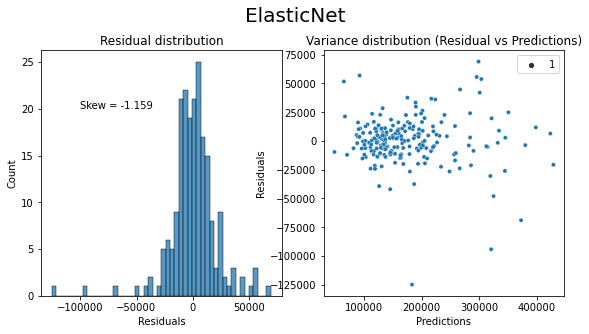

In [30]:
# Test elastic net assumptions

fig, axes = plt.subplots(1, 2,figsize=(8,4))
plt.tight_layout()
fig.suptitle('ElasticNet', y=1.1, fontsize=20)

# Residual Normality

residuals = enetcv.predict(X_test) - y_test
sns.histplot(residuals, bins=50, ax = axes[0])
axes[0].set_title('Residual distribution')
axes[0].set_xlabel('Residuals')
axes[0].text(x=-100000, y=20, s='Skew = ' + str(round(skew(residuals),3)))

# Residual variance

sns.scatterplot(x=enetcv.predict(X_test), y=residuals, ax = axes[1], size=1)
axes[1].set_title('Variance distribution (Residual vs Predictions)')
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')

fig.savefig('./Charts/enet_residual.jpg', bbox_inches='tight')

<font color='blue'> Skew of the residuals is reasonable with no discernible pattern, hence we conclude that linear assumptions are met

### Stacking predictions

In [31]:
stacked_all_test = (ridgecv.predict(X_test) + lassocv.predict(X_test) + enetcv.predict(X_test))/3
stacked_all_train = (ridgecv.predict(X_train) + lassocv.predict(X_train) + enetcv.predict(X_train))/3

print(f'Ensemble train rmse: {mse(y_pred=stacked_all_train, y_true=y_train, squared=False)}')
print(f'Ensemble test rmse: {mse(y_pred=stacked_all_test, y_true=y_test, squared=False)}')

Ensemble train rmse: 16156.135455605023
Ensemble test rmse: 20461.293027508847


<font color='blue'> Stacking of the 3 models by averaging predictions improves the training RMSE, with a small improvement in the test RMSE

### Rank coefficients for each model

In [32]:
# Percentage of zero-ed out variables

print('Proportion of zero-ed out variables for Ridge: ' + str(sum(ridgecv.coef_ == 0)/len(ridgecv.coef_)))
print('Proportion of zero-ed out variables for Lasso: ' + str(sum(lassocv.coef_ == 0)/len(lassocv.coef_)))
print('Proportion of zero-ed out variables for ElasticNet: ' + str(sum(enetcv.coef_ == 0)/len(enetcv.coef_)))

Proportion of zero-ed out variables for Ridge: 0.0207726655018443
Proportion of zero-ed out variables for Lasso: 0.9374878664337022
Proportion of zero-ed out variables for ElasticNet: 0.1430790137837313


In [33]:
# Check coefficients

coef_dict = pd.concat([col_dict_df, pd.Series(ridgecv.coef_), pd.Series(lassocv.coef_), pd.Series(enetcv.coef_)], axis=1)
coef_dict.columns = ['combi', 'first_term', 'second_term', 'combined_term', 'ridgecv', 'lassocv', 'enetcv']
coef_dict.sort_values('ridgecv', key=abs, ascending=False).head()

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
540,x4 x50,Mas Vnr Area,Neighborhood_D,Mas Vnr Area-Neighborhood_D,-1336.390603,-4980.823843,-1271.680388
635,x5 x50,BsmtFin SF 1,Neighborhood_D,BsmtFin SF 1-Neighborhood_D,-1306.851573,-3668.898693,-1284.770136
504,x4 x14,Mas Vnr Area,Bsmt Half Bath,Mas Vnr Area-Bsmt Half Bath,-1040.430367,-1592.324379,-972.450288
914,x8 x50,Total Bsmt SF,Neighborhood_D,Total Bsmt SF-Neighborhood_D,-981.847232,-4767.813008,-1008.500485
1419,x14 x24,Bsmt Half Bath,Open Porch SF,Bsmt Half Bath-Open Porch SF,-954.347331,-905.930807,-902.285678


In [34]:
coef_dict.sort_values('lassocv', key=abs, ascending=False).head()

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
309,x2 x12,Overall Qual,Gr Liv Area,Overall Qual-Gr Liv Area,824.169808,16833.639606,827.182487
628,x5 x43,BsmtFin SF 1,Land Contour_Lvl,BsmtFin SF 1-Land Contour_Lvl,847.591922,10887.019843,821.528780
406,x3 x12,Overall Cond,Gr Liv Area,Overall Cond-Gr Liv Area,855.304713,8339.436398,861.594085
533,x4 x43,Mas Vnr Area,Land Contour_Lvl,Mas Vnr Area-Land Contour_Lvl,704.689148,6941.212258,660.768098
306,x2 x9,Overall Qual,1st Flr SF,Overall Qual-1st Flr SF,789.305804,6101.678333,781.434184


In [35]:
coef_dict.sort_values('enetcv', key=abs, ascending=False).head()

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
635,x5 x50,BsmtFin SF 1,Neighborhood_D,BsmtFin SF 1-Neighborhood_D,-1306.851573,-3668.898693,-1284.770136
540,x4 x50,Mas Vnr Area,Neighborhood_D,Mas Vnr Area-Neighborhood_D,-1336.390603,-4980.823843,-1271.680388
914,x8 x50,Total Bsmt SF,Neighborhood_D,Total Bsmt SF-Neighborhood_D,-981.847232,-4767.813008,-1008.500485
504,x4 x14,Mas Vnr Area,Bsmt Half Bath,Mas Vnr Area-Bsmt Half Bath,-1040.430367,-1592.324379,-972.450288
1419,x14 x24,Bsmt Half Bath,Open Porch SF,Bsmt Half Bath-Open Porch SF,-954.347331,-905.930807,-902.285678


# Model Validation with cross_val_score

 ##### [Back to Contents](#Contents:)

In [36]:
val_df = pd.DataFrame(
    data = {'Ridge': [
            np.mean(cross_val_score(Ridge(alpha = ridgecv.alpha_), X_train, y_train, cv = 10, scoring = 'r2')),
            np.mean(abs(cross_val_score(Ridge(alpha = ridgecv.alpha_), X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))**0.5),
            np.std(abs(cross_val_score(Ridge(alpha = ridgecv.alpha_), X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))**0.5)
            ],
            'Lasso': [
            np.mean(cross_val_score(Lasso(alpha = lassocv.alpha_), X_train, y_train, cv = 10, scoring = 'r2')),
            np.mean(abs(cross_val_score(Lasso(alpha = lassocv.alpha_), X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))**0.5),
            np.std(abs(cross_val_score(Lasso(alpha = lassocv.alpha_), X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))**0.5)
            ],
            'ElasticNet': [
            np.mean(cross_val_score(ElasticNet(alpha = enetcv.alpha_, l1_ratio = enetcv.l1_ratio_), X_train, y_train, cv = 10, scoring = 'r2')),
            np.mean(abs(cross_val_score(ElasticNet(alpha = enetcv.alpha_, l1_ratio = enetcv.l1_ratio_), X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))**0.5),                
            np.std(abs(cross_val_score(ElasticNet(alpha = enetcv.alpha_, l1_ratio = enetcv.l1_ratio_), X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))**0.5)                            
            ]
           },
    index = ['R2', 'RMSE', 'Std Dev']
)

val_df

C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356932280252.2829, tolerance: 1055114711.2893883
  model = cd_fast.enet_coordinate_descent(
C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340255670028.57043, tolerance: 1041098433.6170797
  model = cd_fast.enet_coordinate_descent(
C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356311037897.46545, tolerance: 1054021033.174778
  model = cd_fast.enet_coordinate_descent(
C:\HA\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objec

,Ridge,Lasso,ElasticNet
R2,0.874578,0.857349,0.872820
RMSE,26738.818587,27994.784126,26857.408012
Std Dev,8872.735259,11296.699884,9030.308714


<font color='blue'> Based on earlier results (CV on train followed by testing), we see that Lasso > Ridge > ElasticNet, both in terms of R2 and RMSE. While test scores are worse than train scores indicating overfitting, the overall high performance (0.92 R2 and 20.4k RMSE) indicates an overall robust model.
    
<font color='blue'> Based on cross val score (CV on train), we see that Lasso performed worst, while Ridge does the best.
    
<font color='blue'> My personal preference would be to use Lasso as it provides the added advantage of forcing majority of the coefficients (94%) to zero, or feature selection, in other words.

# Interpreting the Lasso Model

 ##### [Back to Contents](#Contents:)

In [37]:
print(f'Lasso CV best alpha: {lassocv.alpha_}')
print(f'Lasso CV train score: {lassocv.score(X_train, y_train)}')
print(f'Lasso CV test score: {lassocv.score(X_test, y_test)}')
print(f'Lasso CV train rmse: {mse(y_pred=lassocv.predict(X_train), y_true=y_train, squared=False)}')
print(f'Lasso CV test rmse: {mse(y_pred=lassocv.predict(X_test), y_true=y_test, squared=False)}')

Lasso CV best alpha: 497.979797979798
Lasso CV train score: 0.9568874949209919
Lasso CV test score: 0.9288341043969233
Lasso CV train rmse: 16505.51633625022
Lasso CV test rmse: 20468.500229034053


In [38]:
coef_dict.sort_values('lassocv', ascending=False).head()

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
309,x2 x12,Overall Qual,Gr Liv Area,Overall Qual-Gr Liv Area,824.169808,16833.639606,827.182487
628,x5 x43,BsmtFin SF 1,Land Contour_Lvl,BsmtFin SF 1-Land Contour_Lvl,847.591922,10887.019843,821.528780
406,x3 x12,Overall Cond,Gr Liv Area,Overall Cond-Gr Liv Area,855.304713,8339.436398,861.594085
533,x4 x43,Mas Vnr Area,Land Contour_Lvl,Mas Vnr Area-Land Contour_Lvl,704.689148,6941.212258,660.768098
306,x2 x9,Overall Qual,1st Flr SF,Overall Qual-1st Flr SF,789.305804,6101.678333,781.434184


### Manually create top 5 variables and look at its correlation heatmap

In [39]:
X_dummy2 = pd.concat([X_dummy[['Overall Qual', 'Gr Liv Area', 'BsmtFin SF 1', 'Land Contour_Lvl', 'Overall Cond', 'Mas Vnr Area', 'Total Bsmt SF']], y], axis=1)
X_dummy2.head()

,Overall Qual,Gr Liv Area,BsmtFin SF 1,Land Contour_Lvl,Overall Cond,Mas Vnr Area,Total Bsmt SF,SalePrice
0,6,1479,533.0,1,8,289.0,725.0,130500
1,7,2122,637.0,1,5,132.0,913.0,220000
2,5,1057,731.0,1,7,0.0,1057.0,109000
3,5,1444,0.0,1,5,0.0,384.0,174000
4,6,1445,0.0,1,8,0.0,676.0,138500


<AxesSubplot:>

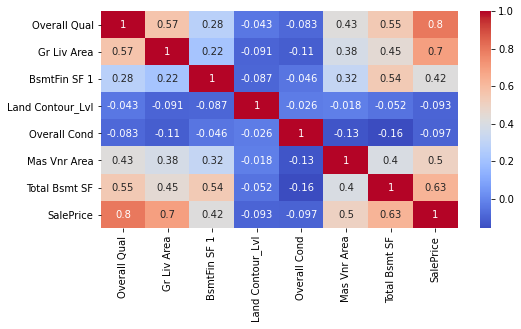

In [40]:
plt.figure(figsize=(8,4))
sns.heatmap(X_dummy2.corr(), annot=True, cmap='coolwarm')

<font color='blue'> Individual variables may not correlate well with Sale Price. Also, good sign that there are variables which are strongly correlated here.

In [41]:
# Manually create interaction terms

X_dummy2['Overall Qual-Gr Liv Area'] = X_dummy2['Overall Qual'] * X_dummy2['Gr Liv Area']
X_dummy2['BsmtFin SF 1-Land Contour_Lvl'] = X_dummy2['BsmtFin SF 1'] * X_dummy2['Land Contour_Lvl']
X_dummy2['Overall Cond-Gr Liv Area'] = X_dummy2['Overall Cond'] * X_dummy2['Gr Liv Area']
X_dummy2['Mas Vnr Area-Land Contour_Lvl'] = X_dummy2['Mas Vnr Area'] * X_dummy2['Land Contour_Lvl']
X_dummy2['Overall Cond-Total Bsmt SF'] = X_dummy2['Overall Cond'] * X_dummy2['Total Bsmt SF']

In [42]:
plt.figure(figsize=(8,4))
X_dummy2.corr()['SalePrice']

Overall Qual                     0.800207
Gr Liv Area                      0.697038
BsmtFin SF 1                     0.423856
Land Contour_Lvl                -0.092830
Overall Cond                    -0.097019
Mas Vnr Area                     0.503579
Total Bsmt SF                    0.625775
SalePrice                        1.000000
Overall Qual-Gr Liv Area         0.837152
BsmtFin SF 1-Land Contour_Lvl    0.329939
Overall Cond-Gr Liv Area         0.561882
Mas Vnr Area-Land Contour_Lvl    0.413834
Overall Cond-Total Bsmt SF       0.563509
Name: SalePrice, dtype: float64

<Figure size 576x288 with 0 Axes>

<font color='blue'> Interaction terms have stronger correlation with SalePrice

# Output for Kaggle

 ##### [Back to Contents](#Contents:)

### Clean test set in the same way

In [43]:
test = pd.read_csv('datasets/test.csv')
test['MS SubClass'] = test['MS SubClass'].astype(str)

In [44]:
## Replace null

test['Alley'] = test['Alley'].apply(lambda x: 'No access' if pd.isna(x) else x)
test['Lot Frontage'] = test['Lot Frontage'].apply(lambda x: np.mean(test['Lot Frontage']) if pd.isna(x) else x)
test['Mas Vnr Area'] = test.apply(lambda x: 0 if pd.isna(x['Mas Vnr Type']) else x['Mas Vnr Area'], axis=1)
test['Mas Vnr Type'] = test['Mas Vnr Type'].apply(lambda x: 'None' if pd.isna(x) else x)
test['Fence'] = test['Fence'].apply(lambda x: 'No fence' if pd.isna(x) else x)
test['Fireplace Qu'] = test['Fireplace Qu'].apply(lambda x: 'No fireplace' if pd.isna(x) else x)
test['Misc Feature'] = test['Misc Feature'].apply(lambda x: 'No misc feature' if pd.isna(x) else x)

# 'No bsmt' if no basement

test['Bsmt Qual'] = test.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) else x['Bsmt Qual'], axis = 1)
test['Bsmt Cond'] = test.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) else x['Bsmt Cond'], axis = 1)

# Can have type 1 but no type 2
# Continuous set to 0 if no basement

test['BsmtFin Type 1'] = test.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) else x['BsmtFin Type 1'], axis = 1)
test['BsmtFin SF 1'] = test.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['BsmtFin SF 1'], axis = 1)
test['BsmtFin SF 2'] = test.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) or pd.isna(x['BsmtFin Type 2']) else x['BsmtFin SF 2'], axis = 1)
test['BsmtFin Type 2'] = test.apply(lambda x: 'No bsmt' if pd.isna(x['Bsmt Exposure']) or pd.isna(x['BsmtFin Type 2']) else x['BsmtFin Type 2'], axis = 1)
test['Bsmt Unf SF'] = test.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Bsmt Unf SF'], axis = 1)
test['Total Bsmt SF'] = test.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Total Bsmt SF'], axis = 1)
test['Bsmt Full Bath'] = test.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Bsmt Full Bath'], axis = 1)
test['Bsmt Half Bath'] = test.apply(lambda x: 0 if pd.isna(x['Bsmt Exposure']) else x['Bsmt Half Bath'], axis = 1)
test['Bsmt Exposure'] = test['Bsmt Exposure'].apply(lambda x: 'No bsmt' if pd.isna(x) else x)

# 'No garage' if no garage

test['Garage Type'] = test.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Type'], axis = 1)
test['Garage Cars'] = test.apply(lambda x: 0 if pd.isna(x['Garage Finish']) else x['Garage Cars'], axis = 1)
test['Garage Area'] = test.apply(lambda x: 0 if pd.isna(x['Garage Finish']) else x['Garage Area'], axis = 1)
test['Garage Qual'] = test.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Qual'], axis = 1)
test['Garage Cond'] = test.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Cond'], axis = 1)
test['Garage Finish'] = test.apply(lambda x: 'No garage' if pd.isna(x['Garage Finish']) else x['Garage Finish'], axis = 1)

In [45]:
# Minimal aggregation to sync columns between train.csv and test.csv

#test['Exterior 1st'] = test['Exterior 1st'].apply(lambda x: 'Others' if x=='PreCast' else x)
#test['Exterior 2nd'] = test['Exterior 2nd'].apply(lambda x: 'Others' if x in ('Other', 'PreCast') else x)
#test['Mas Vnr Type'] = test['Mas Vnr Type'].apply(lambda x: 'Stone' if x in ('CBlock') else x)
#test['Kitchen Qual'] = test['Kitchen Qual'].apply(lambda x: 'Fa' if x in ('Po') else x)

In [46]:
MSSubClass = {'60':'A','120':'A','80':'A','75':'A','20':'B','85':'B','150':'B','70':'B','160':'C','90':'C','50':'C','190':'C','40':'D','45':'D','180':'D','30':'D'}
test['MS SubClass'] = test['MS SubClass'].map(MSSubClass)

MSZoning = {'FV':0,'RL':1}
test['MS Zoning'] = test['MS Zoning'].apply(lambda x: 'FV' if x=='FV' else 'RL' if x=='RL' else 'Others')

test['Lot Shape'] = test['Lot Shape'].apply(lambda x: 'Others' if x=='IR2' or x=='IR3' else x)

test['Lot Config'] = test['Lot Config'].apply(lambda x: 'Others' if x in ('CulDSac', 'FR3', 'FR2') else x)

test['Neighborhood'] = test['Neighborhood'].apply(lambda x: 'A' if x in ('StoneBr', 'NridgHt', 'NoRidge', 'GrnHill') else 'B' if x in ('Veenker', 'ClearCr',
       'Somerst', 'Timber', 'CollgCr', 'Crawfor', 'Blmngtn', 'Greens') else 'C' if x in ('NWAmes', 'SawyerW', 'Gilbert', 'Mitchel', 'NPkVill', 'NAmes',
       'Blueste', 'Landmrk') else 'D')

test['Condition 1'] = test['Condition 1'].apply(lambda x: 'A' if x in ('PosA', 'PosN', 'RRNn', 'RRAn') else 'Norm' if x=='Norm' else 'B')

test['Bldg Type'] = test['Bldg Type'].apply(lambda x: 'TwnhsE' if x == 'TwnhsE' else '1Fam' if x=='1Fam' else 'Others')

test['House Style'] = test['House Style'].apply(lambda x: 'A' if x in ('2.5Fin', '2Story', '2.5Unf') else 'B' if x in ('SLvl', '1Story', 'SFoyer') else 'C')

test['Roof Style'] = test['Roof Style'].apply(lambda x: 'A' if x in ('Shed', 'Hip', 'Flat') else 'Gable' if x=='Gable' else 'B')

test['Exterior 1st'] = test['Exterior 1st'].apply(lambda x: 'A' if x in ('ImStucc', 'Stone', 'CemntBd', 'VinylSd', 'BrkFace') else 'B' if x in ('BrkComm',
       'Plywood', 'HdBoard', 'MetalSd') else 'C')

test['Exterior 2nd'] = test['Exterior 2nd'].apply(lambda x: 'A' if x in ('CmentBd', 'VinylSd') else 'B' if x in ('ImStucc', 'BrkFace', 'HdBoard', 'Plywood',
       'Brk Cmn', 'Stucco', 'Wd Shng') else 'C')

test['Exter Cond'] = test['Exter Cond'].apply(lambda x: 'A' if x in ('Ex', 'TA') else 'B')

test['Foundation'] = test['Foundation'].apply(lambda x: 'A' if x=='PConc' else 'B' if x in ('Wood', 'CBlock') else 'C')

test['Bsmt Qual'] = test['Bsmt Qual'].apply(lambda x: 'Others' if x in ('No bsmt', 'Fa', 'Po') else x)

test['Bsmt Cond'] = test['Bsmt Cond'].apply(lambda x: 'Others' if x in ('Ex', 'Fa', 'No bsmt', 'Po') else x)

test['Bsmt Exposure'] = test['Bsmt Exposure'].apply(lambda x: 'Others' if x in ('Gd', 'Av', 'Mn') else x)

test['BsmtFin Type 1'] = test['BsmtFin Type 1'].apply(lambda x: 'Others' if x in ('ALQ', 'BLQ', 'LwQ', 'Rec', 'No bsmt') else x)

test['BsmtFin Type 2'] = test['BsmtFin Type 2'].apply(lambda x: 'Others' if x != 'Unf' else x)

test['Heating QC'] = test['Heating QC'].apply(lambda x: 'Others' if x != 'Ex' and x!= 'Gd' else x)

test['Electrical'] = test['Electrical'].apply(lambda x: 'Others' if x != 'SBrkr' else x)

test['Functional'] = test['Functional'].apply(lambda x: 'Others' if x != 'Typ' else x)

test['Fireplace Qu'] = test['Fireplace Qu'].apply(lambda x: 'A' if x in ('Ex', 'Gd') else 'B' if x in ('TA', 'Fa', 'Po') else x)

test['Garage Type'] = test['Garage Type'].apply(lambda x: 'A' if x in ('BuiltIn', 'Attchd') else 'B')

test['Garage Qual'] = test['Garage Qual'].apply(lambda x: 'A' if x in ('Gd', 'TA') else 'B')

test['Garage Cond'] = test['Garage Cond'].apply(lambda x: 'A' if x in ('Gd', 'TA') else 'B')

test['Fence'] = test['Fence'].apply(lambda x: 'Others' if x != 'No fence' else x)

test['Mas Vnr Type'] = test['Mas Vnr Type'].apply(lambda x: 'BrkCmn' if x=='CBlock' else x)

test['Kitchen Qual'] = test['Kitchen Qual'].apply(lambda x: 'Fa' if x=='Po' else x)

In [47]:
# Feature engineering

test['Age sold'] = test.apply(lambda x: 0 if x['Yr Sold'] <= x['Year Built'] else x['Yr Sold'] - x['Year Built'], axis = 1)
test['Age remodelled'] = test.apply(lambda x: x['Year Remod/Add'] - x['Year Built'] if x['Year Built'] < x['Year Remod/Add'] else 0, axis = 1)

# Drop unwanted columns
fields_to_drop = [
    'PID', # useless
    'Year Built', # Replaced with Age sold
    'Year Remod/Add', # Replaced with Age remodelled
    'Garage Yr Blt', # Difficult to handle as some houses do not have garages. Cannot impute 0
    'Pool Area', # only 8 houses have pools
    'Pool QC', # only 8 houses have pools
    'Sale Type', # details of sale should not affect sale price
    'Utilities', # mostly 1 value
    'Condition 2', # mostly 1 value
    'Roof Matl', # mostly 1 value
    'Heating', # mostly 1 value
    'Misc Feature', # mostly 1 value
    'Misc Val'
]
test.drop(fields_to_drop, axis = 1, inplace=True)

In [48]:
test.drop(['3Ssn Porch'], axis = 1, inplace=True)

cat_cols_test = [col for col in test.columns if test[col].dtype == 'O']
num_cols_test = [col for col in test.columns if test[col].dtype == 'int64' or test[col].dtype == 'float']

In [49]:
test = test.set_index('Id')

In [50]:
# Dummify categorical variables
test_dummy = pd.get_dummies(test, drop_first=True, columns=cat_cols_test)

# Add interaction terms

poly2 = PolynomialFeatures(interaction_only=True, include_bias=False).fit(test_dummy)
test_poly = poly2.transform(test_dummy)

# Scale data

#ss = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)
ss.fit(X_train)
test_poly = ss.transform(test_poly)

In [51]:
kaggle = pd.DataFrame({'Id': test.index, 'SalePrice': lassocv.predict(test_poly)})
kaggle.to_csv('kaggle_output.csv', index=False)

In [52]:
# Stacking predictions
stacked_test = (ridgecv.predict(test_poly) + lassocv.predict(test_poly) + enetcv.predict(test_poly))/3
kaggle = pd.DataFrame({'Id': test.index, 'SalePrice': stacked_test})
kaggle.to_csv('kaggle_output_stacked.csv', index=False)

# Does PolynomialFeatures help in price prediction?

 ##### [Back to Contents](#Contents:)

In [53]:
# Split into X and y

X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

# Dummify categorical variables
X_dummy = pd.get_dummies(X, drop_first=True, columns=cat_cols)

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.1, random_state=42)

# Scale data

ss = StandardScaler()
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1845, 101)
(206, 101)
(1845,)
(206,)


In [54]:
# Find baseline score without hyperparameter tuning

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso(max_iter=10000)
enet = ElasticNet()

lr.fit(X_train, y_train)
print(f'{lr} train score: {lr.score(X_train, y_train)}')
print(f'{lr} test score: {lr.score(X_test, y_test)}')
print(f'{lr} train rmse: {mse(y_pred=lr.predict(X_train), y_true=y_train, squared=False)}')
print(f'{lr} test rmse: {mse(y_pred=lr.predict(X_test), y_true=y_test, squared=False)}')
print('\n---------------------')

print(f'Baseline using mean train score: {r2_score(y_true = y_train, y_pred = np.full(len(y_train), np.mean(y_train)))}')
print(f'Baseline using mean test score: {r2_score(y_true = y_test, y_pred = np.full(len(y_test), np.mean(y_train)))}')
print(f'Baseline using mean train rmse: {mse(y_pred=np.full(len(y_train), np.mean(y_train)), y_true=y_train, squared=False)}')
print(f'Baseline using mean test rmse: {mse(y_pred=np.full(len(y_test), np.mean(y_test)), y_true=y_test, squared=False)}')

LinearRegression() train score: 0.8765737284241045
LinearRegression() test score: 0.8862994369803686
LinearRegression() train rmse: 27927.45049012431
LinearRegression() test rmse: 25872.08147066718

---------------------
Baseline using mean train score: 0.0
Baseline using mean test score: -0.005953911936618761
Baseline using mean train rmse: 79492.74343105893
Baseline using mean test rmse: 76727.32591779814


In [55]:
# Ridge

print(f'Start time: {datetime.datetime.now().time()}')

ridgecv2 = RidgeCV(alphas = np.logspace(1,5,1000), cv=5).fit(X_train, y_train)
print(f'Ridge CV best alpha: {ridgecv2.alpha_}')
print(f'Ridge CV best score: {ridgecv2.best_score_}')
print(f'Ridge CV train score: {ridgecv2.score(X_train, y_train)}')
print(f'Ridge CV test score: {ridgecv2.score(X_test, y_test)}')
print(f'Ridge CV train rmse: {mse(y_pred=ridgecv2.predict(X_train), y_true=y_train, squared=False)}')
print(f'Ridge CV test rmse: {mse(y_pred=ridgecv2.predict(X_test), y_true=y_test, squared=False)}')

print(f'End time: {datetime.datetime.now().time()}')
print('\n')
# Fitting back to Ridge() gives the same results

# Lasso

print(f'Start time: {datetime.datetime.now().time()}')

lassocv2 = LassoCV(n_alphas = 1000, cv=5).fit(X_train, y_train)
print(f'Lasso CV best alpha: {lassocv2.alpha_}')
print(f'Lasso CV train score: {lassocv2.score(X_train, y_train)}')
print(f'Lasso CV test score: {lassocv2.score(X_test, y_test)}')
print(f'Lasso CV train rmse: {mse(y_pred=lassocv2.predict(X_train), y_true=y_train, squared=False)}')
print(f'Lasso CV test rmse: {mse(y_pred=lassocv2.predict(X_test), y_true=y_test, squared=False)}')

print(f'End time: {datetime.datetime.now().time()}')
print('\n')
# ElasticNet

print(f'Start time: {datetime.datetime.now().time()}')

enetcv2 = ElasticNetCV(n_alphas = 1000, cv=5, l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000, tol=0.01).fit(X_train, y_train)
print(f'Elasticnet CV best alpha: {enetcv2.alpha_}')
print(f'Elasticnet CV best l1 ratio: {enetcv2.l1_ratio_}')
print(f'Elasticnet CV train score: {enetcv2.score(X_train, y_train)}')
print(f'Elasticnet CV test score: {enetcv2.score(X_test, y_test)}')
print(f'Elasticnet CV train rmse: {mse(y_pred=enetcv2.predict(X_train), y_true=y_train, squared=False)}')
print(f'Elasticnet CV test rmse: {mse(y_pred=enetcv2.predict(X_test), y_true=y_test, squared=False)}')

print(f'End time: {datetime.datetime.now().time()}')

Start time: 23:03:06.279737
Ridge CV best alpha: 19.243509752303314
Ridge CV best score: 0.8614614939466188
Ridge CV train score: 0.8934760927399343
Ridge CV test score: 0.8976559260594098
Ridge CV train rmse: 25944.841949326186
Ridge CV test rmse: 24546.038601443823
End time: 23:03:24.135985


Start time: 23:03:24.136981
Lasso CV best alpha: 124.26609709986083
Lasso CV train score: 0.8929188033432618
Lasso CV test score: 0.8956131895769617
Lasso CV train rmse: 26012.619804947783
Lasso CV test rmse: 24789.791635032154
End time: 23:03:24.828861


Start time: 23:03:24.828861
Elasticnet CV best alpha: 122.5594074016263
Elasticnet CV best l1 ratio: 1.0
Elasticnet CV train score: 0.8929495929033776
Elasticnet CV test score: 0.8955784825957483
Elasticnet CV train rmse: 26008.87977062146
Elasticnet CV test rmse: 24793.91240146488
End time: 23:03:28.717064


In [56]:
# Dummify categorical variables
test_dummy = pd.get_dummies(test, drop_first=True, columns=cat_cols_test)

# Scale data

test_dummy_scaled = ss.transform(test_dummy)

In [57]:
stacked_test = ridgecv2.predict(test_dummy_scaled)
kaggle = pd.DataFrame({'Id': test.index, 'SalePrice': stacked_test})
kaggle.to_csv('kaggle_output_nopoly_ridge.csv', index=False)

<font color='blue'> Nope, PolynomialFeatures do help improve the model prediction significantly. However, as this results in plenty of noise and useless combinations, Lasso comes in handy by "removing" most of the noise.

# Conclusions

 ##### [Back to Contents](#Contents:)

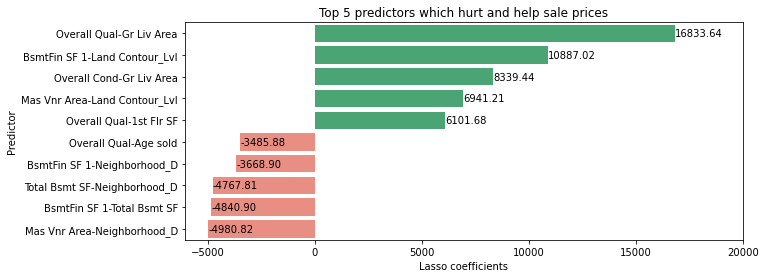

In [58]:
plt.figure(figsize=(10,4))

ax = sns.barplot(data = coef_dict[['combined_term', 'lassocv']].sort_values('lassocv', ascending=False).head().append( 
                   coef_dict[['combined_term', 'lassocv']].sort_values('lassocv', ascending=False).tail())
                    , y = 'combined_term'
                    , x = 'lassocv'
                    , palette = ['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon']
                    , label = 'lassocv')
ax.set_xlabel('Lasso coefficients')
ax.set_xbound(upper=20000)
ax.set_ylabel('Predictor')
ax.set_title('Top 5 predictors which hurt and help sale prices')


for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.savefig('./Charts/topbottom5predictors.jpg', bbox_inches='tight')

In [59]:
coef_dict.sort_values('lassocv', ascending=False).head()

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
309,x2 x12,Overall Qual,Gr Liv Area,Overall Qual-Gr Liv Area,824.169808,16833.639606,827.182487
628,x5 x43,BsmtFin SF 1,Land Contour_Lvl,BsmtFin SF 1-Land Contour_Lvl,847.591922,10887.019843,821.528780
406,x3 x12,Overall Cond,Gr Liv Area,Overall Cond-Gr Liv Area,855.304713,8339.436398,861.594085
533,x4 x43,Mas Vnr Area,Land Contour_Lvl,Mas Vnr Area-Land Contour_Lvl,704.689148,6941.212258,660.768098
306,x2 x9,Overall Qual,1st Flr SF,Overall Qual-1st Flr SF,789.305804,6101.678333,781.434184


In [60]:
coef_dict.sort_values('lassocv', ascending=False).tail()

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
326,x2 x29,Overall Qual,Age sold,Overall Qual-Age sold,-169.515769,-3485.880723,-280.045990
635,x5 x50,BsmtFin SF 1,Neighborhood_D,BsmtFin SF 1-Neighborhood_D,-1306.851573,-3668.898693,-1284.770136
914,x8 x50,Total Bsmt SF,Neighborhood_D,Total Bsmt SF-Neighborhood_D,-981.847232,-4767.813008,-1008.500485
593,x5 x8,BsmtFin SF 1,Total Bsmt SF,BsmtFin SF 1-Total Bsmt SF,-561.795137,-4840.897445,-549.839463
540,x4 x50,Mas Vnr Area,Neighborhood_D,Mas Vnr Area-Neighborhood_D,-1336.390603,-4980.823843,-1271.680388


- <font color='blue'> While some variables have strong correlation with price (eg. Overall Qual), none of them alone is good enough to contribute to the model significantly.
    
- <font color='blue'> Rather, combinations of features are better as predicting features.
    
- <font color='blue'> Based on the top 5 features, we see that Overall Cond and Gr Living Area appear more than once.
    
- <font color='blue'> SalePrice is most sensitive to the feature "Overall Qual-Gr Liv Area". Each unit increase in this feature results in an increase of $16,583 of SalePrice.</font>

- <font color='blue'> Based on the bottom 5 features, we see that Neighborhood D appears quite a few times, indicating that this cluster of neighborhoods (SWISU, Sawyer, BrkSide, Edwards, OldTown, BrDale, IDOTRR and MeadowV) is not doing well in terms of price appreciation.

- <font color='blue'> These neighborhoods could attract lower housing prices due to older houses (such as OldTown) or perhaps some local demographic properties of that neighborhood.

- <font color='blue'> Neighborhood is not that significant in influencing housing prices as other factors.

- <font color='blue'> The term "Mas Vnr Area-Neighborhood_D" hurts house prices the most. Each unit increase depresses the price by $4,981. This is imaginable as older houses tend to fetch less value than newer houses.
    
- <font color='blue'> This model is unlikely to be generalizable to other cities. In this model, we used all 5000 factors to determine housing prices because we did not have enough domain knowledge to perform manual feature selection. In reality, two populations may not share the same "taste" for desirable features in a house.
    
- <font color='blue'> To make the model more generalizable, it would be better to cut down on the number of variables and use only general features, such as distance to a transport system. This would of course come at an expense of the predictive power of the model.

# Recommendations

 ##### [Back to Contents](#Contents:)

In [61]:
coef_dict.sort_values('lassocv', ascending=False).head(10)

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
309,x2 x12,Overall Qual,Gr Liv Area,Overall Qual-Gr Liv Area,824.169808,16833.639606,827.182487
628,x5 x43,BsmtFin SF 1,Land Contour_Lvl,BsmtFin SF 1-Land Contour_Lvl,847.591922,10887.019843,821.528780
406,x3 x12,Overall Cond,Gr Liv Area,Overall Cond-Gr Liv Area,855.304713,8339.436398,861.594085
533,x4 x43,Mas Vnr Area,Land Contour_Lvl,Mas Vnr Area-Land Contour_Lvl,704.689148,6941.212258,660.768098
306,x2 x9,Overall Qual,1st Flr SF,Overall Qual-1st Flr SF,789.305804,6101.678333,781.434184
402,x3 x8,Overall Cond,Total Bsmt SF,Overall Cond-Total Bsmt SF,603.034039,5363.449082,610.007399
626,x5 x41,BsmtFin SF 1,Land Contour_HLS,BsmtFin SF 1-Land Contour_HLS,559.574984,5165.450176,542.882006
318,x2 x21,Overall Qual,Garage Cars,Overall Qual-Garage Cars,608.968690,5054.913219,699.116350
201,x1 x2,Lot Area,Overall Qual,Lot Area-Overall Qual,479.693019,3627.564074,465.865463
1311,x12 x89,Gr Liv Area,Functional_Typ,Gr Liv Area-Functional_Typ,606.518521,3309.785215,596.959179


In [62]:
set(list(coef_dict.sort_values('lassocv', ascending=False).head(10)['first_term']) + list(
coef_dict.sort_values('lassocv', ascending=False).head(10)['second_term']))

{'1st Flr SF',
 'BsmtFin SF 1',
 'Functional_Typ',
 'Garage Cars',
 'Gr Liv Area',
 'Land Contour_HLS',
 'Land Contour_Lvl',
 'Lot Area',
 'Mas Vnr Area',
 'Overall Cond',
 'Overall Qual',
 'Total Bsmt SF'}

In [63]:
coef_dict.sort_values('lassocv', ascending=True).head(10)

,combi,first_term,second_term,combined_term,ridgecv,lassocv,enetcv
540,x4 x50,Mas Vnr Area,Neighborhood_D,Mas Vnr Area-Neighborhood_D,-1336.390603,-4980.823843,-1271.680388
593,x5 x8,BsmtFin SF 1,Total Bsmt SF,BsmtFin SF 1-Total Bsmt SF,-561.795137,-4840.897445,-549.839463
914,x8 x50,Total Bsmt SF,Neighborhood_D,Total Bsmt SF-Neighborhood_D,-981.847232,-4767.813008,-1008.500485
635,x5 x50,BsmtFin SF 1,Neighborhood_D,BsmtFin SF 1-Neighborhood_D,-1306.851573,-3668.898693,-1284.770136
326,x2 x29,Overall Qual,Age sold,Overall Qual-Age sold,-169.515769,-3485.880723,-280.045990
984,x9 x29,1st Flr SF,Age sold,1st Flr SF-Age sold,-192.535328,-3244.232131,-252.097157
609,x5 x24,BsmtFin SF 1,Open Porch SF,BsmtFin SF 1-Open Porch SF,-920.211216,-2748.063566,-865.801337
346,x2 x49,Overall Qual,Neighborhood_C,Overall Qual-Neighborhood_C,-359.321731,-2585.169204,-321.443426
514,x4 x24,Mas Vnr Area,Open Porch SF,Mas Vnr Area-Open Porch SF,-945.178524,-2551.232623,-876.589504
1004,x9 x49,1st Flr SF,Neighborhood_C,1st Flr SF-Neighborhood_C,-339.446248,-2547.033761,-309.069039


- <font color='blue'> Based on the top 10 predictors, there are 10 unique features.
    - 1st Flr SF
    - BsmtFin SF 1
    - Functional
    - Garage Cars
    - Gr Liv Area
    - Land Contour
    - Lot Area
    - Mas Vnr Area
    - Overall Cond
    - Overall Qual
    
- <font color='blue'> From the perspective of a homeowner trying to improve the value of his/her house, only 3 out of 10 of the features are amenable. The other 7 are more or less fixed when the house is built.
    - Garage Cars - Have a larger garage space
    - Lot Area - Have a larger lot size
    - Mas Vnr Area - Have a larger masonry veneer wall
    
- <font color='blue'> From the perspective of a homebuyer looking to eventually flip the house for a profit, the model recommends the following features:
    - Larger houses in terms of area
    - Houses on flat ground or hillside
    - Overall good quality in terms of material, finish and condition of the house
    - Small or no garage
    - Small lot area
    - Small or no masonry veneer wall
    
- <font color='blue'> The last 3 recommendations are there such that after the purchase of the house, the new homeowner can remodel the house to include these features which would then improve the house value.
    
- <font color='blue'> From a cursory glance at the top 10 predictors that hurt house values, three features stand out - Neighborhoods C and D and Age sold. Homeowners should not wait too long to sell their houses while homebuyers should avoid buying houses which have been built for a long time, and/or situated within these 2 neighborhoods.